<a href="https://colab.research.google.com/github/ekajanuartati/CustomerChurnFinal_Classification/blob/main/Customer_Churn_Final_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data diri :

Ni Putu Eka januartati

**Business Understanding**

Masalah yang paling sering di hadapi CRM perusahaan operator telekomunikasi seluler dalah usaha menurunkan jumlah pelanggan yang berhenti menggunakan layanan perusahaan dan pindah ke perusahaan kompetitor. Perilaku pelanggan yang meninggalkan layanan yang diberikan perusahaan pada industri operator seluler disebut dengan *churn*.

Dalam perusahaan operator seluler tentu terdapat kerugian pendapatan, salah satunya yang diakibatkan banyaknya pelanggan yang berpaling pada operator lain (*churn*). Oleh karena itu *churn* dapat mengurangi keuntungan perusahaan, maka manajemen *churn* menjadi senjata yang krusial dalam berkompetisi, dan suatu fondasi pada suatu perusahaan pemasaran berorientasi pelanggan.

Dengan menggunakan pendekatan machine learning yang dilatih menggunakan data historical dari *churn* suatu perusahaan akan membantu dalam proses pemerolehan informasi berdasarkan prediksinya apakah dimasa yang akan datang sebagai contoh apakah akan terdapat pelanggan *churn* dalam klasifikasi ini (yes/no).  


**Problem Statements**


*   Apakah machine learning dapat diimplementasikan untuk studi kasus klasifikasi *churn* ?
*   Bagaimana performa masing-masing model machine learning yang akan digunakan pada studi kasus klasifikasi *churn* ?





**Goals**



*   Dapat mengimplementasikan model machine learning yang dilatih menggunakan data historical *churn*.
*   Mengevaluasi performa dari machine learning dan membandingkan satu sama lain.

**Data Understanding**

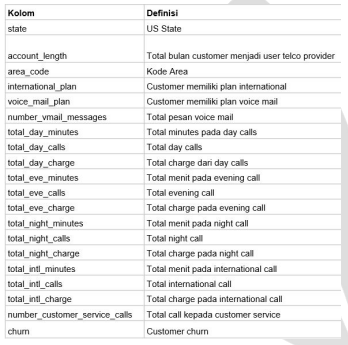

**Klasifikasi Churn**

Import Library yang diperlukan

In [ ]:
#import Library utama yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

**Data Preparation**

In [ ]:
#Load data
df = pd.read_csv('train.csv')
df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

Data Quality Checking

In [ ]:
#Check missing value
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [ ]:
#Check informasi mengenai tipe dataset pada masing-masong kolom 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
#Check jumlah kolom dan baris dataset
df.shape

(4250, 20)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

<Figure size 432x288 with 0 Axes>

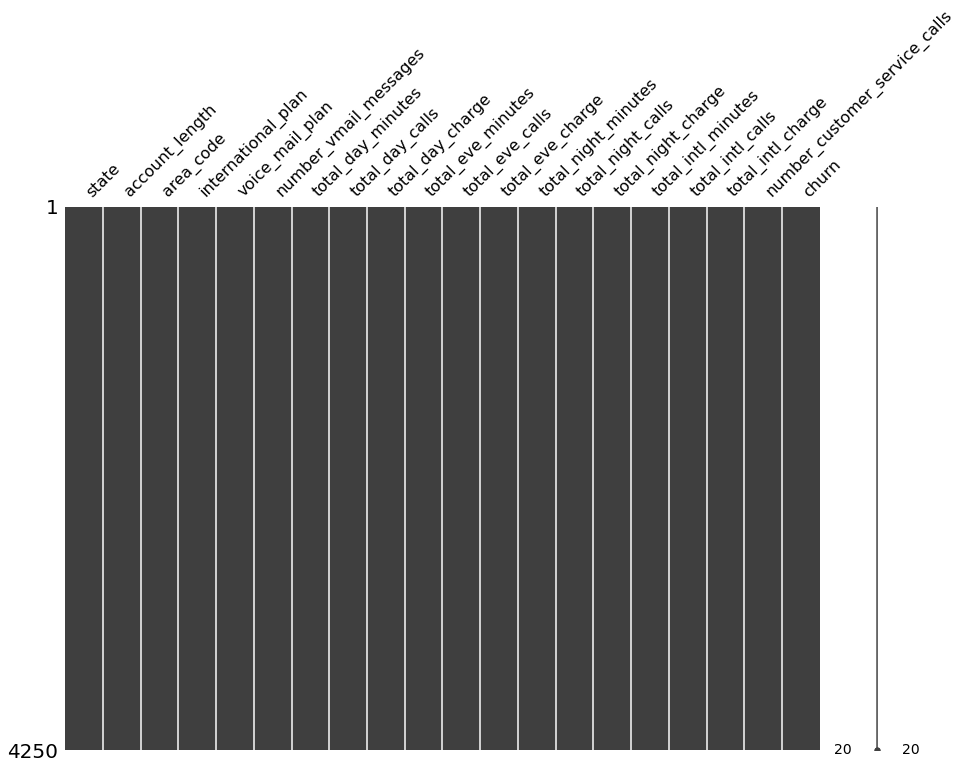

In [ ]:
#Check secara visual missing value menggunakan library missingno
import missingno as msno
plt.figure()

msno.matrix(df, figsize = (15,10))
plt.show()

**Descriptive statistics**

In [ ]:
#Check informasi statistik pada dataset
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count     4250.000000            4250.000000        4250.000000   
mean       100.236235               7.631765         180.259600   
std         39.698401              13.439882          54.012373   
min          1.000000               0.000000           0.000000   
25%         73.000000               0.000000         143.325000   
50%        100.000000               0.000000         180.450000   
75%        127.000000              16.000000         216.200000   
max        243.000000              52.000000         351.500000   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count      4250.000000       4250.000000        4250.000000      4250.000000   
mean         99.907294         30.644682         200.173906       100.176471   
std          19.850817          9.182096          50.249518        19.908591   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.365000         165.925000        87.000000   
50%         100.000000         30.680000         200.700000       100.000000   
75%         113.000000         36.750000         233.775000       114.000000   
max         165.000000         59.760000         359.300000       170.000000   

       total_eve_charge  total_night_minutes  total_night_calls  \
count       4250.000000          4250.000000        4250.000000   
mean          17.015012           200.527882          99.839529   
std            4.271212            50.353548          20.093220   
min            0.000000             0.000000           0.000000   
25%           14.102500           167.225000          86.000000   
50%           17.060000           200.450000         100.000000   
75%           19.867500           234.700000         113.000000   
max           30.540000           395.000000         175.000000   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count         4250.000000         4250.000000       4250.000000   
mean             9.023892           10.256071          4.426353   
std              2.265922            2.760102          2.463069   
min              0.000000            0.000000          0.000000   
25%              7.522500            8.500000          3.000000   
50%              9.020000           10.300000          4.000000   
75%             10.560000           12.000000          6.000000   
max             17.770000           20.000000         20.000000   

       total_intl_charge  number_customer_service_calls  
count        4250.000000                    4250.000000  
mean            2.769654                       1.559059  
std             0.745204                       1.311434  
min             0.000000                       0.000000  
25%             2.300000                       1.000000  
50%             2.780000                       1.000000  
75%             3.240000                       2.000000  
max             5.400000                       9.000000

kita dapat melihat atau memvisualisasikan data secara univariat terkait presentase data churn dari pelanggan. Menggunakan fungsi value.counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart.

**EDA (Exploratory Data Analysis)**

In [ ]:
#Printing the unique value inside "churn" column
df["churn"].unique()

array(['no', 'yes'], dtype=object)

not_churned:  3652 , churned:  598


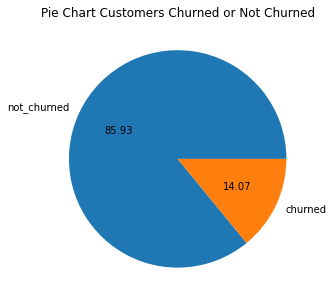

In [ ]:
#checking imbalance data dan visualisasikan menggunakan pie chart

not_churned = df[df['churn']=='no']['churn'].count()
churned = df[df['churn']=='yes']['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned or Not Churned')
plt.show()

Pada perolehan visualisasi di atas bahwa presentase customer yang tidak melakukan churn adalah 85.93% atau berjumlah 3652 data sedangkan yang melakukan churn sebanyak 14.07% atau berjumlah 598 data. Dan ini menunjukan bahwa porsi data antara not_churned dan churned ialah imbalanced data.

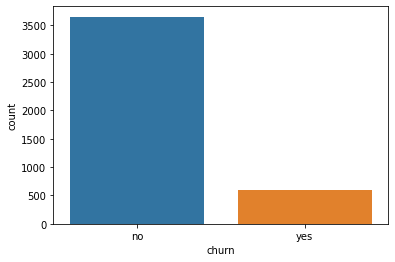

In [ ]:
#let's see churn by using countplot
sns.countplot(x=df.churn)

In [ ]:
#menghapus nilai yang kosong
#df.dropna(inplace = True)

#konversi nilai churn menjadi boolean
df['churn'].replace(to_replace ='no', value=0, inplace=True)
df['churn'].replace(to_replace ='yes', value=1, inplace=True)

mydf = pd.get_dummies(df)
mydf.head()

account_length  number_vmail_messages  total_day_minutes  total_day_calls  \
0             107                     26              161.6              123   
1             137                      0              243.4              114   
2              84                      0              299.4               71   
3              75                      0              166.7              113   
4             121                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  ...  state_WI  state_WV  state_WY  \
0                254.4                103  ...         0         0         0   
1                162.6                104  ...         0         0         0   
2                196.9                 89  ...         0         0         0   
3                186.9                121  ...         0         0         0   
4                212.6                118  ...         0         0         0   

   area_code_area_code_408  area_code_area_code_415  area_code_area_code_510  \
0                        0                        1                        0   
1                        0                        1                        0   
2                        1                        0                        0   
3                        0                        1                        0   
4                        0                        0                        1   

   international_plan_no  international_plan_yes  voice_mail_plan_no  \
0                      1                       0                   0   
1                      1                       0                   1   
2                      0                       1                   1   
3                      0                       1                   1   
4                      1                       0                   0   

   voice_mail_plan_yes  
0                    1  
1                    0  
2                    0  
3                    0  
4                    1  

[5 rows x 74 columns]

Pada hasil histogram di atas, dapat di lihat bahwa 15% dari jumlah data sudah menunjukan kondisi Churn.

Analisis untuk Column State

In [ ]:
#output column unique state
df['state'].nunique()

51

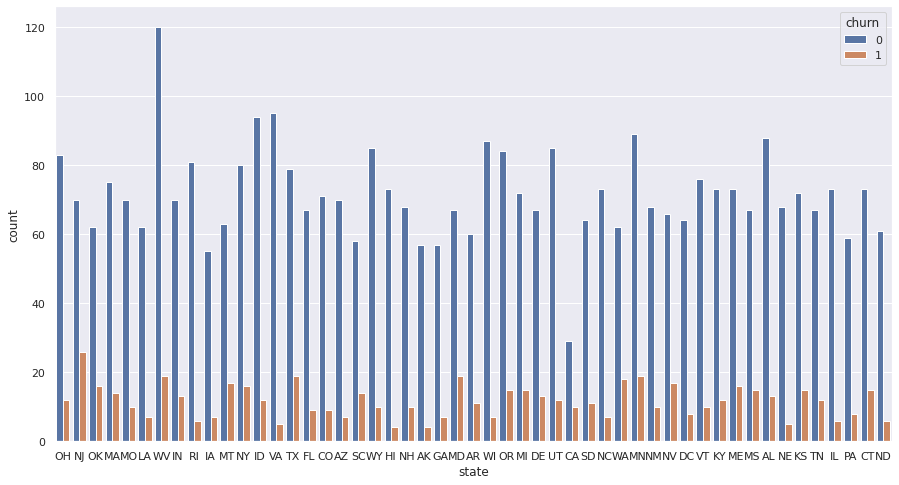

In [ ]:
#perbandingan churn dengan state menggunakan countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state', hue="churn", data=df)
plt.show()

In [ ]:
#melihat tingkat churn
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

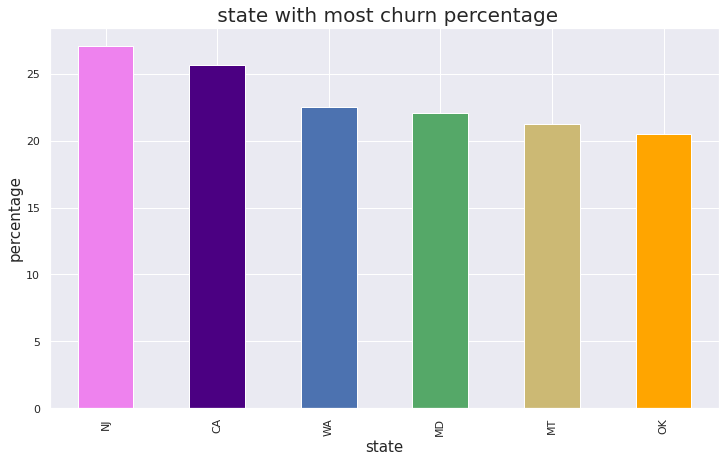

In [ ]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['state'])['churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" state with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [ ]:
State_df = pd.crosstab(df["state"],df["churn"])
State_df['Percentage_Churn'] = State_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_df)

churn    0   1  Percentage_Churn
state                           
AK      57   4          6.557377
AL      88  13         12.871287
AR      60  11         15.492958
AZ      70   7          9.090909
CA      29  10         25.641026
CO      71   9         11.250000
CT      73  15         17.045455
DC      64   8         11.111111
DE      67  13         16.250000
FL      67   9         11.842105
GA      57   7         10.937500
HI      73   4          5.194805
IA      55   7         11.290323
ID      94  12         11.320755
IL      73   6          7.594937
IN      70  13         15.662651
KS      72  15         17.241379
KY      73  12         14.117647
LA      62   7         10.144928
MA      75  14         15.730337
MD      67  19         22.093023
ME      73  16         17.977528
MI      72  15         17.241379
MN      89  19         17.592593
MO      70  10         12.500000
MS      67  15         18.292683
MT      63  17         21.250000
NC      73   7          8.750000
ND      61

In [ ]:
#top 10 churn dari state
df.groupby(['state'])['churn'].mean().sort_values(ascending = False).head(10)

state
NJ    0.270833
CA    0.256410
WA    0.225000
MD    0.220930
MT    0.212500
OK    0.205128
NV    0.204819
SC    0.194444
TX    0.193878
MS    0.182927
Name: churn, dtype: float64

Pada hasil analisa di atas bahwa pada column State terdapat 51 unique yang berbeda-beda serta untuk top 10 dengan churn tertinggi yaitu state NJ, CA, WA, MD, MT, OK, NV, SC, TX, dan MS. Kemungkinan hal itu terjadi mengapa state tersebut dengan kasus churn tertinggi adanya permasalahan pada jaringan. 

Analisis Untuk column Area Code

In [ ]:
Area_code_df = pd.crosstab(df["area_code"],df["churn"])
Area_code_df['Percentage_Churn'] = Area_code_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Area_code_df)

churn             0    1  Percentage_Churn
area_code                                 
area_code_408   934  152         13.996317
area_code_415  1821  287         13.614801
area_code_510   897  159         15.056818


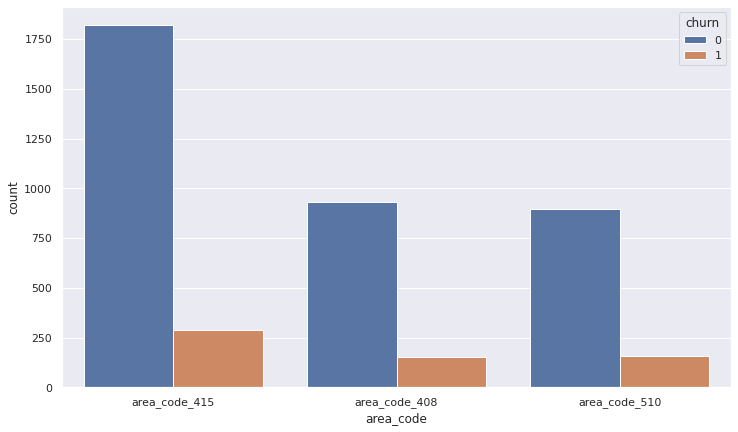

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x='area_code', hue="churn", data=df)
plt.show()

Pada hasil histogram tersebut terdapat hanya 3 unique value yaitu are code 415, 408, dan 510. Tetapi disini menjadi pertanyaan apa hubungan Churn dengan area code sehingga 3 dengan churn tertinggi atau meninggalkan layanan operator.


Analisis Account Length column

In [ ]:
churn_df = df[df["churn"] == bool(True)]
not_churn_df = df[df["churn"] == bool(False)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level f

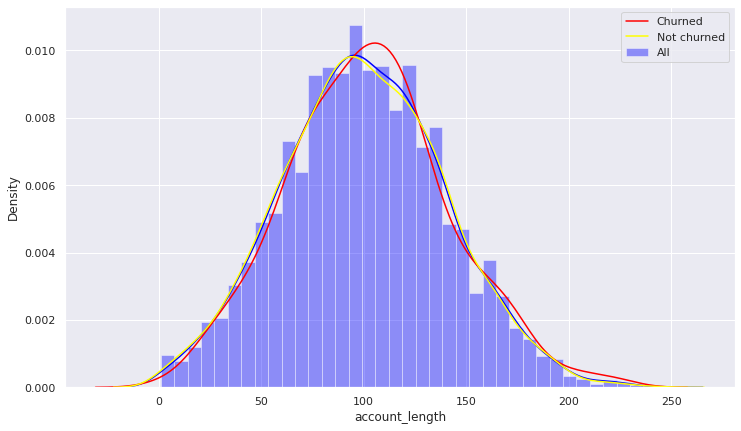

In [ ]:
#account_length vs Churn
sns.distplot(df['account_length'],color = 'blue',label="All")
sns.distplot(churn_df['account_length'],color = "red",hist=False,label="Churned")
sns.distplot(not_churn_df['account_length'],color = 'yellow',hist= False,label="Not churned")
plt.legend()

Analisis International Plan column

In [ ]:
#menampilkan hasil count value untuk ['churn'] 'yes','no'
df['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [ ]:
#check nilai unique pada column international_plan
df["international_plan"].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
InternationalPlan_df = pd.crosstab(df["international_plan"],df["churn"])
InternationalPlan_df['Percentage churn'] = InternationalPlan_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(InternationalPlan_df)

churn                  0    1  Percentage churn
international_plan                             
no                  3423  431         11.183186
yes                  229  167         42.171717


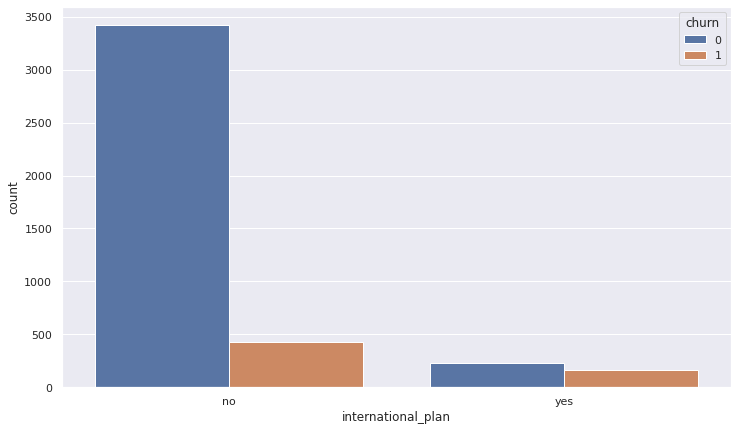

In [ ]:
#check menggunakan countplot
sns.countplot(x='international_plan',hue="churn",data = df)

Pada hasil countplot menunjukan bahwa banyak pelanggan yang tidak memiliki paket internasional dan sedangkan pelanggan yang memiliki paket internasional cenderung sediki. Kemungkinan hal tersebut adanya pengaruh dari biaya panggilan yang cukup tinggi. 

Analisis Voice mail plan column

In [ ]:
#check Voice mail plan column
df["voice_mail_plan"].unique()
print(df["voice_mail_plan"])


#hitung Voice Mail Plan vs Churn percentage
Voice_mail_plan_df = pd.crosstab(df["voice_mail_plan"],df["churn"])
Voice_mail_plan_df['Percentage Churn'] = Voice_mail_plan_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(Voice_mail_plan_df)

0       yes
1        no
2        no
3        no
4       yes
       ... 
4245     no
4246     no
4247     no
4248    yes
4249    yes
Name: voice_mail_plan, Length: 4250, dtype: object
churn               0    1  Percentage Churn
voice_mail_plan                             
no               2622  516         16.443595
yes              1030   82          7.374101


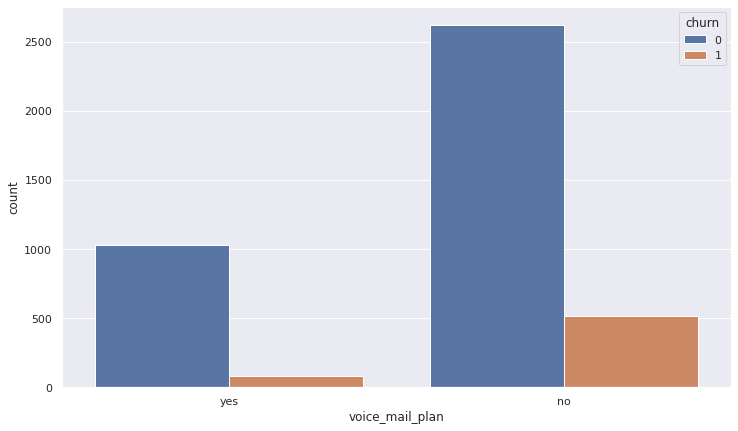

In [ ]:
#analisis menggunakan countplot
sns.countplot(x='voice_mail_plan',hue="churn",data = df)

Dari hasil histogram countplot disini saya tidak menemukan hal yang cukup jelas hubungan antara churn dengan rencana paket suara. Memang pada histrogram terlihat bahwa pelanggan yang tidak memiliki rencana paket suara meninggalkan layanan.

Analisis Number Vmail Messages column

In [ ]:
#check data untuk 'Number vmail messages' 
df['number_vmail_messages'].unique()

array([26,  0, 24, 37, 27, 33, 39, 25, 30, 41, 28, 34, 46, 29, 35, 21, 42,
       22, 36, 23, 43, 31, 38, 40, 32, 48, 18, 17, 45, 16, 20, 14, 19, 15,
       11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  6, 52])

In [ ]:
#check data untuk 'Number vmail messages'
df['number_vmail_messages'].value_counts()

0     3139
31      69
28      58
24      57
29      57
33      55
27      54
26      53
30      47
32      47
25      46
23      40
22      38
34      36
38      35
39      35
21      35
35      34
37      32
36      31
20      29
19      25
40      22
41      18
42      17
18      16
17      16
16      15
43      13
15      12
45      10
12      10
46       7
14       7
44       7
48       4
47       4
10       4
13       3
49       3
6        2
50       2
11       2
8        2
4        1
52       1
Name: number_vmail_messages, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


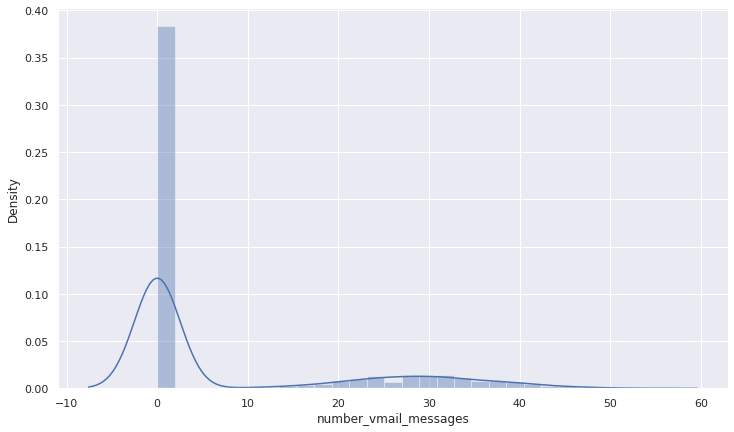

In [ ]:
#analisis menggunakan displot diagram
sns.distplot(df['number_vmail_messages'])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<Figure size 720x576 with 0 Axes>

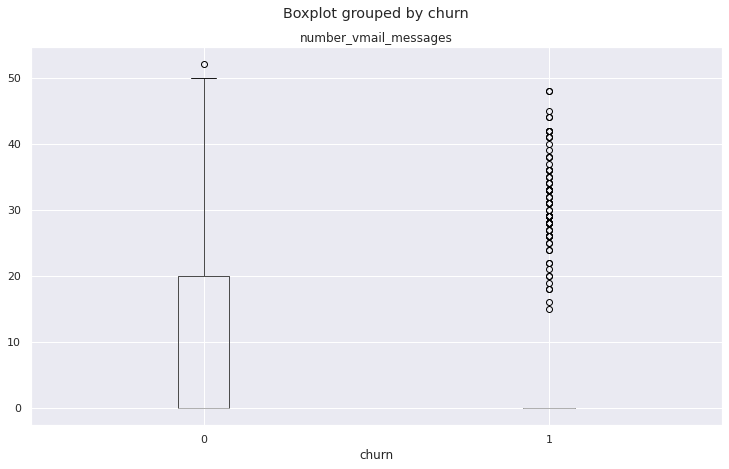

In [ ]:
#Analysis menggunakan boxplot diagram antara 'number vmail messages' and 'churn'
fig = plt.figure(figsize =(10, 8)) 
df.boxplot(column='number_vmail_messages', by='churn')
fig.suptitle('number_vmail_message', fontsize=10, fontweight='bold')
plt.show()

Berdasarkan hasil Boxplot tersebut bahwa jika terdapat 20 atau lebih messages voice mail maka akan melakukan churn atau meninggalkan layanan.

Analisis Customer service calss column 

In [ ]:
#check data customer service calls 
df['number_customer_service_calls'].value_counts()

1    1524
2     947
0     886
3     558
4     209
5      81
6      28
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

In [ ]:
#menghitung Customer service calls vs Churn percentage
customer_calls_df = pd.crosstab(df['number_customer_service_calls'],df["churn"])
customer_calls_df['Percentage_Churn'] = customer_calls_df.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(customer_calls_df)

churn                             0    1  Percentage_Churn
number_customer_service_calls                             
0                               789   97         10.948081
1                              1358  166         10.892388
2                               845  102         10.770855
3                               495   63         11.290323
4                               117   92         44.019139
5                                32   49         60.493827
6                                 9   19         67.857143
7                                 6    7         53.846154
8                                 1    1         50.000000
9                                 0    2        100.000000


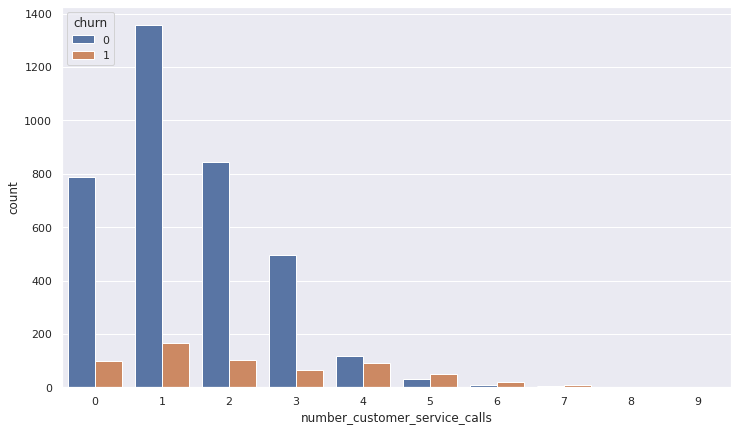

In [ ]:
#Analysis menggunakan countplot
sns.countplot(x='number_customer_service_calls',hue="churn",data = df)

Hasil dari countplot menunjukan bahwa pelayanan pelanggan yang buruk sehingga pelanggan cenderung untuk meninggalkan operator. Data tersebut menunjukan bahwa pelanggan yang menelpon lebih dari 5 kali cenderung akan melakukan churn. Dan yang menelpon hanya 1 kali juga akan melakukan churn hal ini seharusnya menjadi perhatian mengakibatkan operator harus meningkatkan layanan panggilan mereka .

Analisis semua Total Calls 

In [ ]:
#Print rata-rata nilai total day churned dan not churned customer 
print(df.groupby(["churn"])['total_day_calls'].mean())
print(df.groupby(["churn"])['total_day_minutes'].mean())
print(df.groupby(["churn"])['total_day_charge'].mean())

#Print rata-rata nilai total eve churned and not churned customer 
print(df.groupby(["churn"])['total_eve_calls'].mean()) 
print(df.groupby(["churn"])['total_eve_minutes'].mean())
print(df.groupby(["churn"])['total_eve_charge'].mean())

#Print rata-rata nilai total night churned and not churned customer 
print(df.groupby(["churn"])['total_night_calls'].mean()) 
print(df.groupby(["churn"])['total_night_charge'].mean())
print(df.groupby(["churn"])['total_night_minutes'].mean())

#Print rata-rata total intl minutes churned and not churned customer 
print(df.groupby(["churn"])['total_intl_minutes'].mean())
print(df.groupby(["churn"])['total_intl_minutes'].mean())
print(df.groupby(["churn"])['total_intl_minutes'].mean())

churn
0     99.813801
1    100.478261
Name: total_day_calls, dtype: float64
churn
0    175.555093
1    208.990134
Name: total_day_minutes, dtype: float64
churn
0    29.844948
1    35.528679
Name: total_day_charge, dtype: float64
churn
0    100.231380
1     99.841137
Name: total_eve_calls, dtype: float64
churn
0    198.570674
1    209.964883
Name: total_eve_minutes, dtype: float64
churn
0    16.878743
1    17.847207
Name: total_eve_charge, dtype: float64
churn
0    99.942771
1    99.209030
Name: total_night_calls, dtype: float64
churn
0    8.981131
1    9.285033
Name: total_night_charge, dtype: float64
churn
0    199.577519
1    206.331773
Name: total_night_minutes, dtype: float64
churn
0    10.194441
1    10.632441
Name: total_intl_minutes, dtype: float64
churn
0    10.194441
1    10.632441
Name: total_intl_minutes, dtype: float64
churn
0    10.194441
1    10.632441
Name: total_intl_minutes, dtype: float64


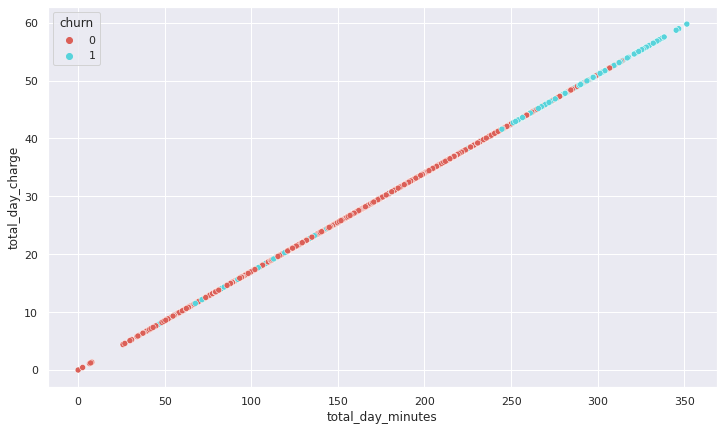

In [ ]:
#relation menggunakan scatter plot
sns.scatterplot(x="total_day_minutes", 
                y="total_day_charge", hue="churn", data=df,palette='hls')

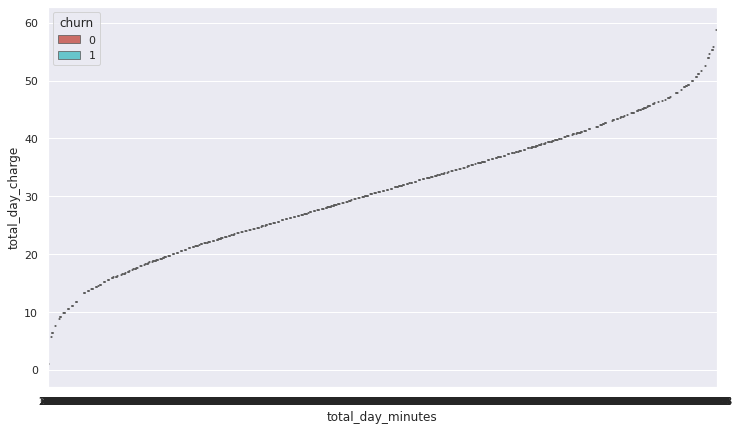

In [ ]:
#relation menggunakan box plot plot
sns.boxplot(x="total_day_minutes", 
            y="total_day_charge", hue="churn", data=df,palette='hls')

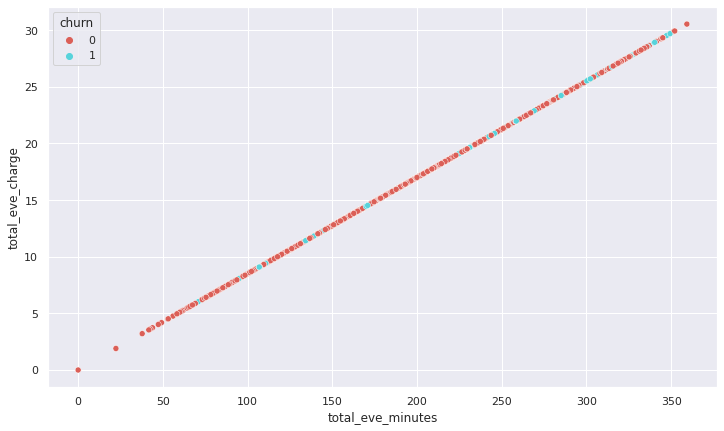

In [ ]:
#relation menggunakan scatter plot
sns.scatterplot(x="total_eve_minutes", 
                y="total_eve_charge", hue="churn", data=df,palette='hls')

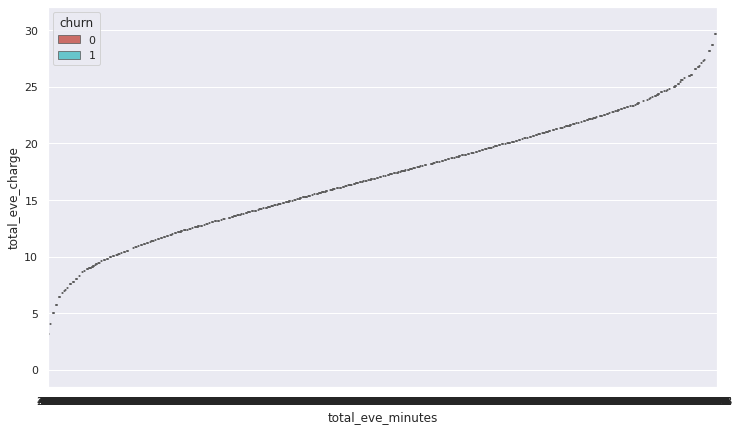

In [ ]:
#relation menggunakan scatter boxplot
sns.boxplot(x="total_eve_minutes", 
                y="total_eve_charge", hue="churn", data=df,palette='hls')

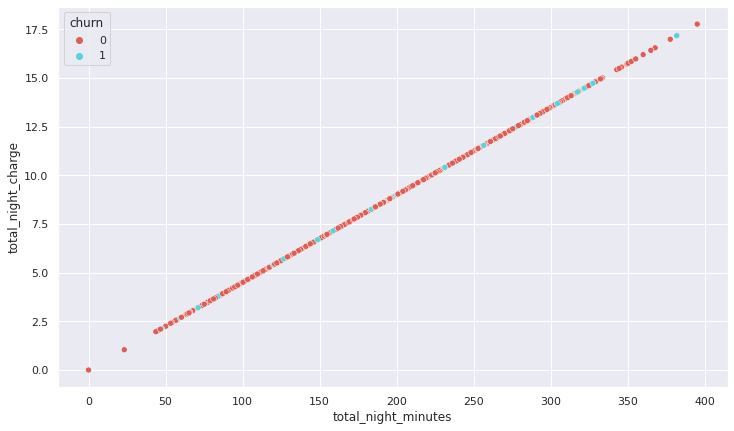

In [ ]:
#relation using scatter plot
sns.scatterplot(x="total_night_minutes", 
                y="total_night_charge", hue="churn", data=df,palette='hls')

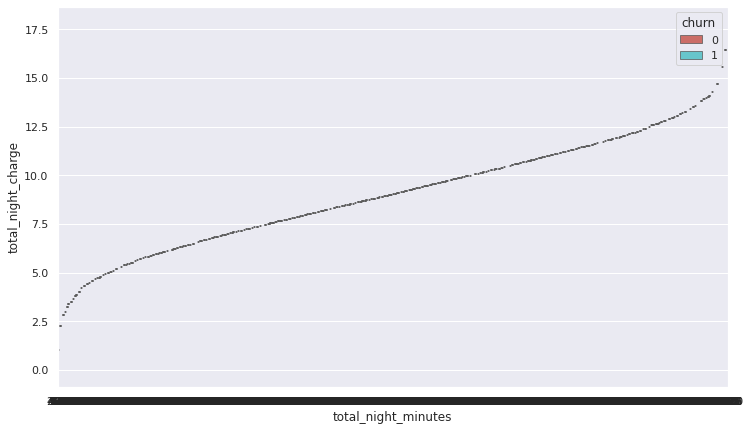

In [ ]:
#relation using scatter plot
sns.boxplot(x="total_night_minutes", 
                y="total_night_charge", hue="churn", data=df,palette='hls')

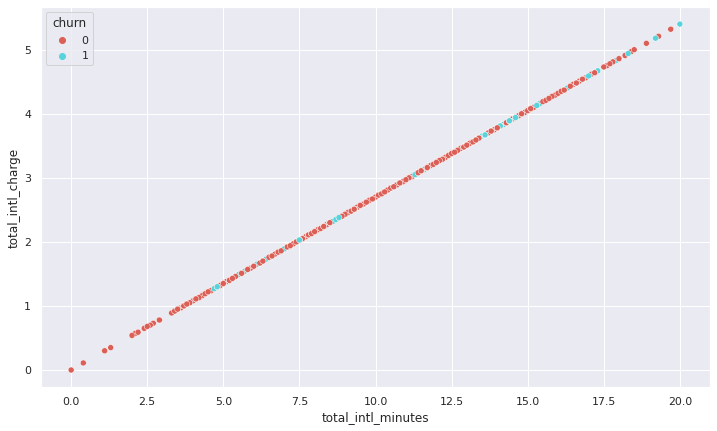

In [ ]:
#relation using scatter plot
sns.scatterplot(x="total_intl_minutes", 
                y="total_intl_charge", hue="churn", 
                data=df,palette='hls')

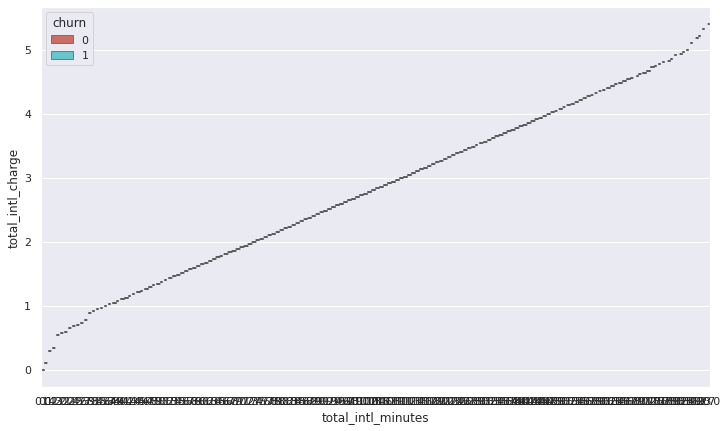

In [ ]:
#relation using box plot
sns.boxplot(x="total_intl_minutes", 
                y="total_intl_charge", hue="churn", 
                data=df,palette='hls')

In [ ]:
#hubungan antara biaya panggilan keseluruhan dan menit panggilan keseluruhan   
day_charge_perm = df['total_day_charge'].mean()/df['total_day_minutes'].mean()
eve_charge_perm = df['total_eve_charge'].mean()/df['total_eve_minutes'].mean()
night_charge_perm = df['total_night_charge'].mean()/df['total_night_minutes'].mean()
int_charge_perm= df['total_intl_charge'].mean()/df['total_intl_minutes'].mean()

#print
print([day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

[0.17000305311307234, 0.08500114782546143, 0.04500068349010583, 0.27005021989845895]


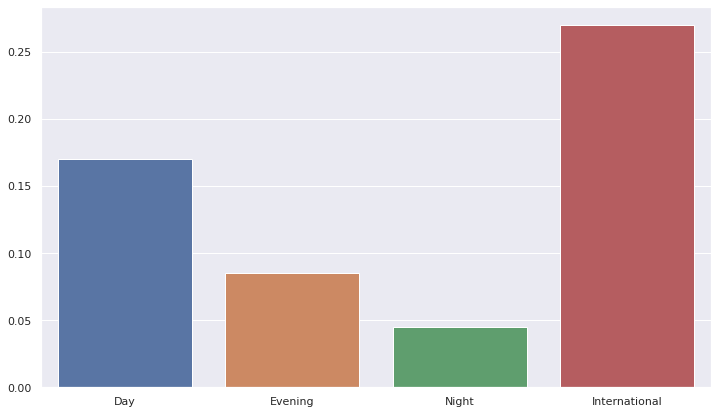

In [ ]:
#tampilan menggunakan countplot
sns.barplot(x=['Day','Evening','Night','International'],y=[day_charge_perm,eve_charge_perm,night_charge_perm,int_charge_perm])

Hasil analisis kumpulan data tersebut, memperoleh bahwa telah bahwa total menit/panggilan/tagihan siang/malam/malam tidak menyebabkan tingkat churn apa pun. Tapi biaya panggilan internasional tinggi dibandingkan dengan yang lain, hal tersebut terjadi mungkin menjadi adanya pelanggan paket internasional untuk keluar.

Univariat Analisis

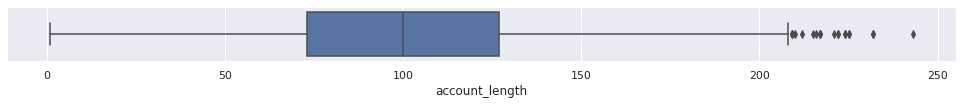

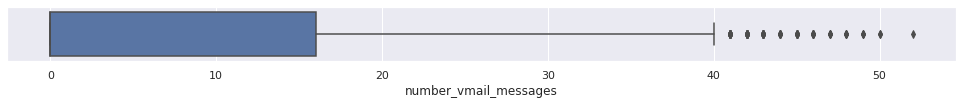

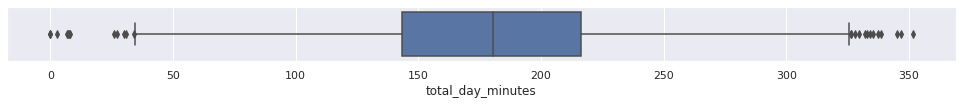

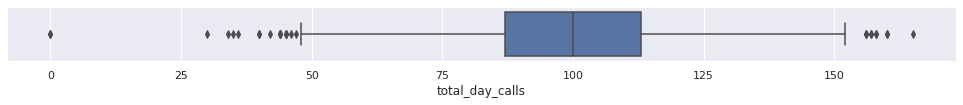

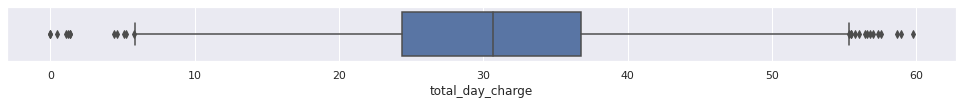

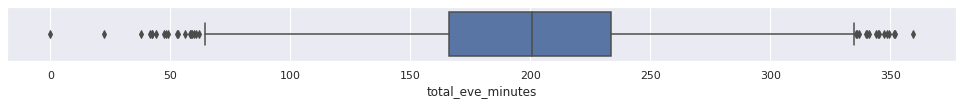

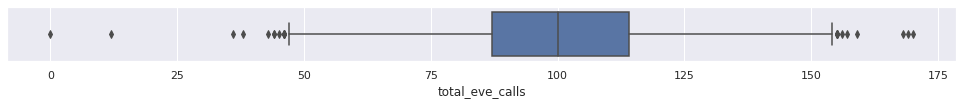

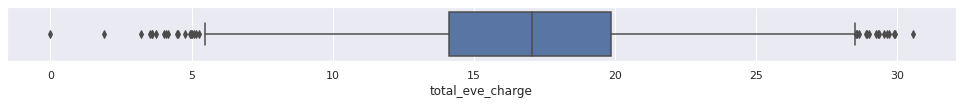

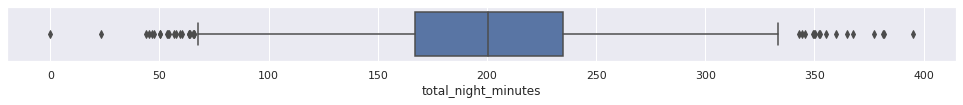

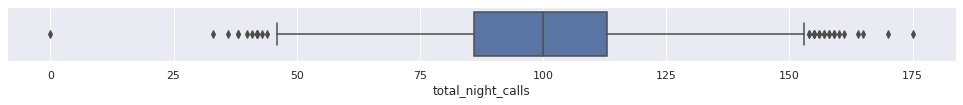

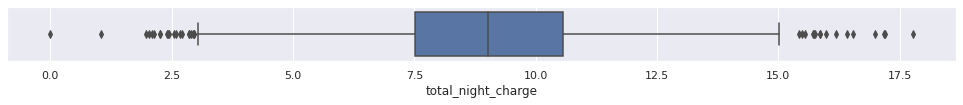

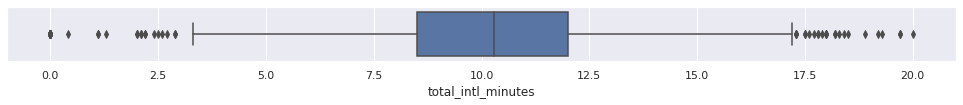

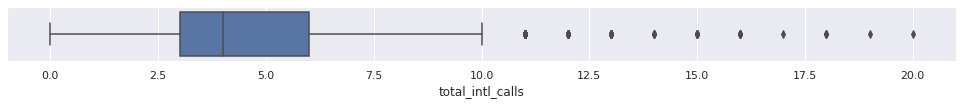

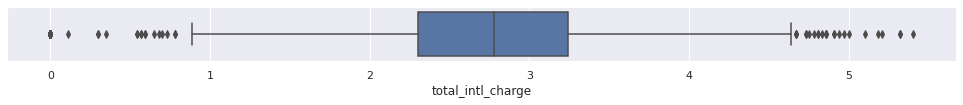

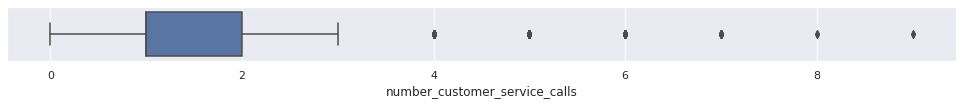

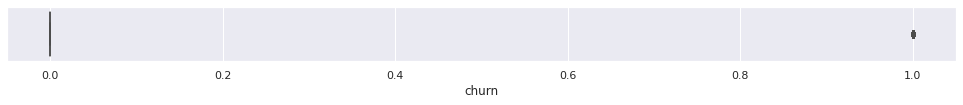

In [ ]:
#output boxplot untuk setiap numerical column pada dataset
mydata=df.select_dtypes(exclude=['object','bool'])
for column in mydata:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=mydata, x=column)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much mem

<Figure size 1224x72 with 0 Axes>

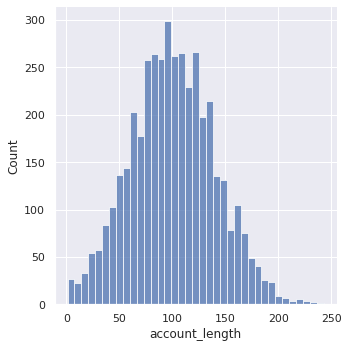

<Figure size 1224x72 with 0 Axes>

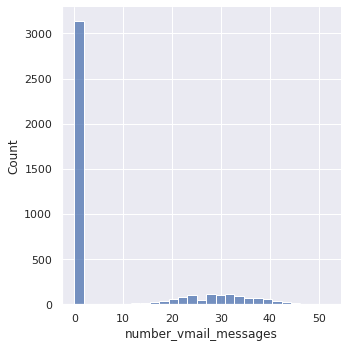

<Figure size 1224x72 with 0 Axes>

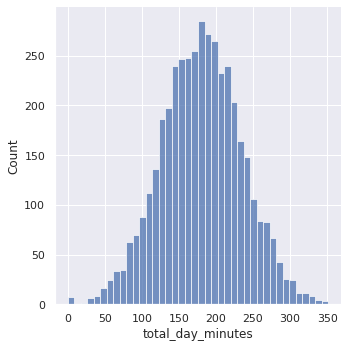

<Figure size 1224x72 with 0 Axes>

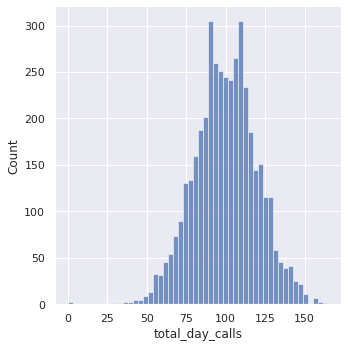

<Figure size 1224x72 with 0 Axes>

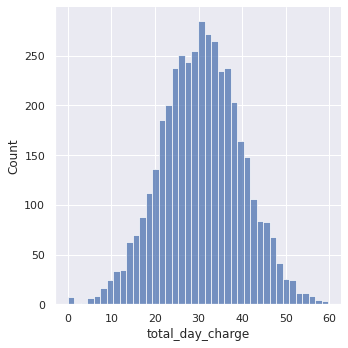

<Figure size 1224x72 with 0 Axes>

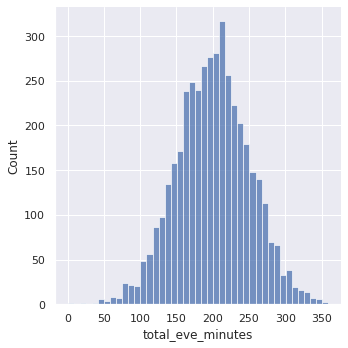

<Figure size 1224x72 with 0 Axes>

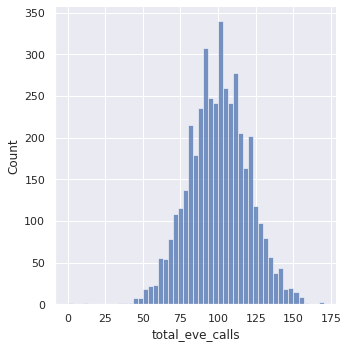

<Figure size 1224x72 with 0 Axes>

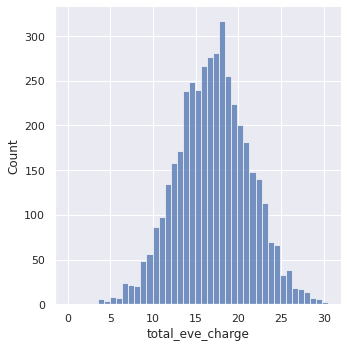

<Figure size 1224x72 with 0 Axes>

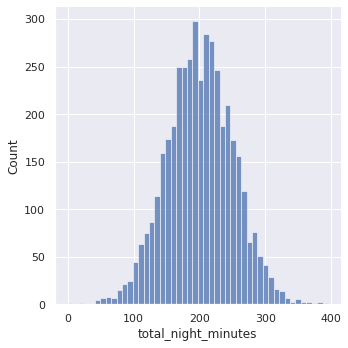

<Figure size 1224x72 with 0 Axes>

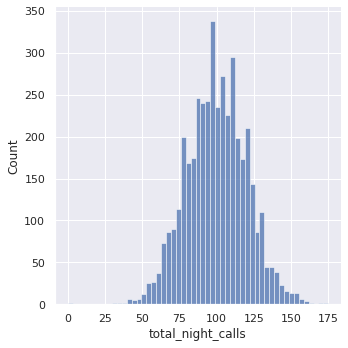

<Figure size 1224x72 with 0 Axes>

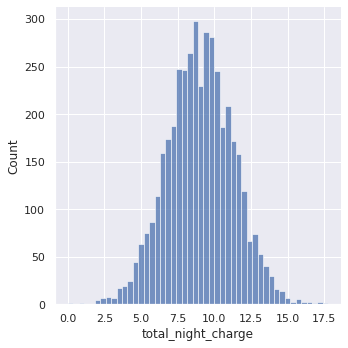

<Figure size 1224x72 with 0 Axes>

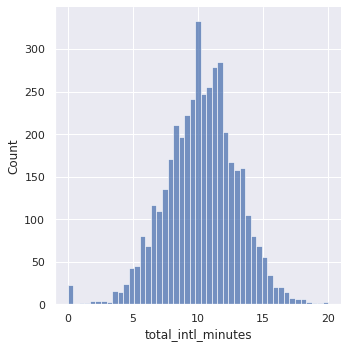

<Figure size 1224x72 with 0 Axes>

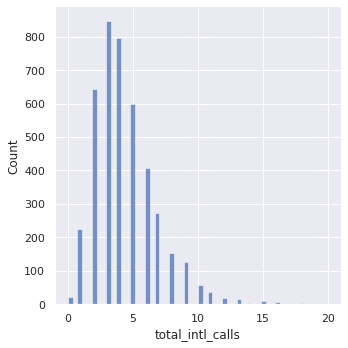

<Figure size 1224x72 with 0 Axes>

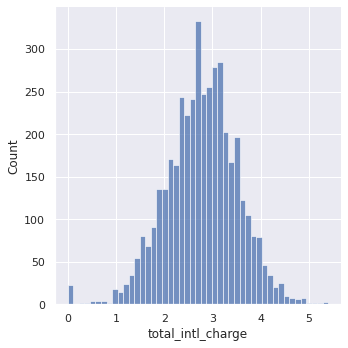

<Figure size 1224x72 with 0 Axes>

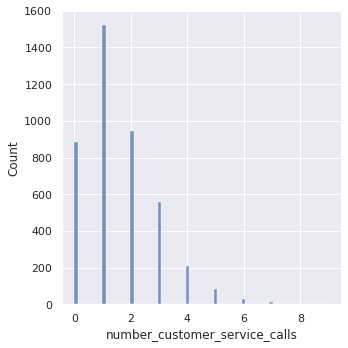

<Figure size 1224x72 with 0 Axes>

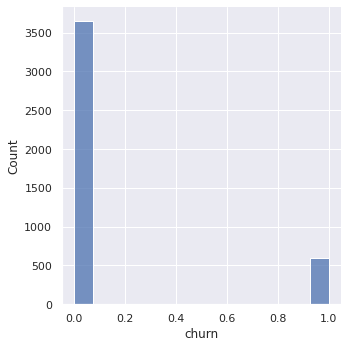

In [ ]:
#output displot untuk setiap numerical column pada data set
mydata=df.select_dtypes(exclude=['object','bool'])
for column in mydata:
        plt.figure(figsize=(17,1))
        sns.displot(data=mydata, x=column)
plt.show()

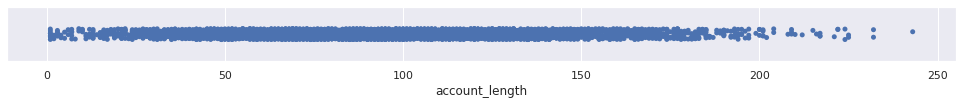

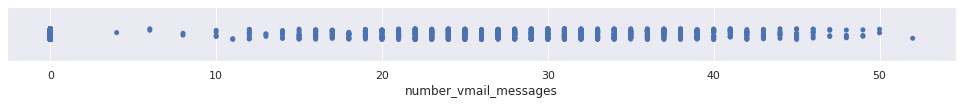

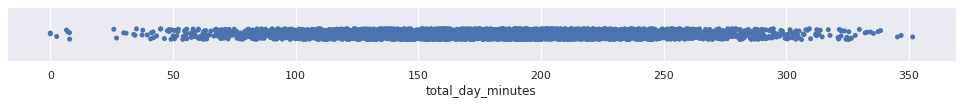

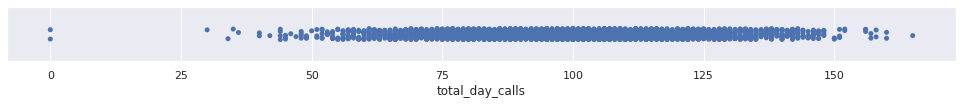

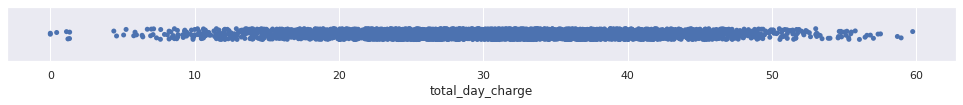

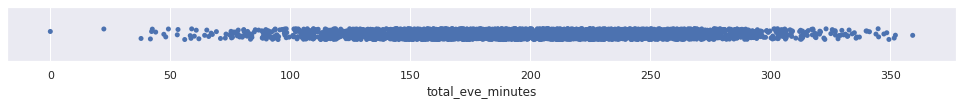

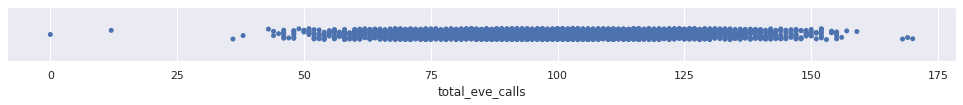

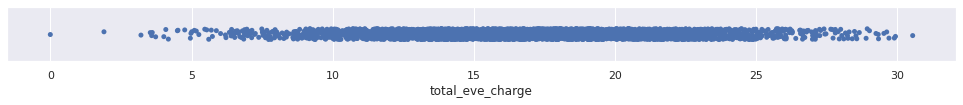

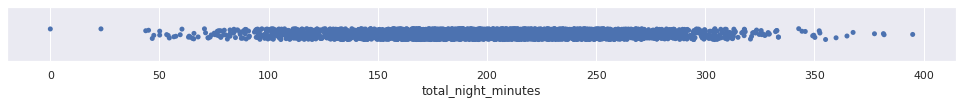

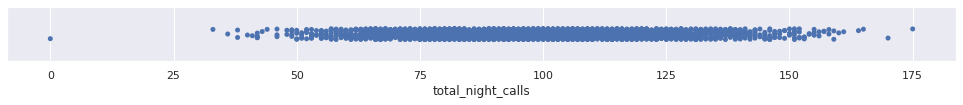

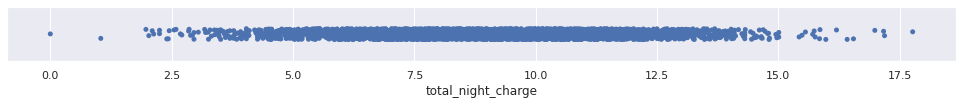

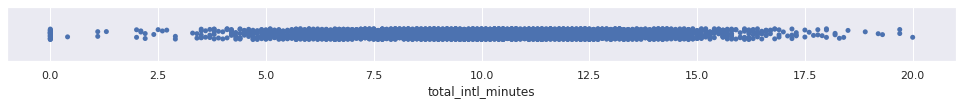

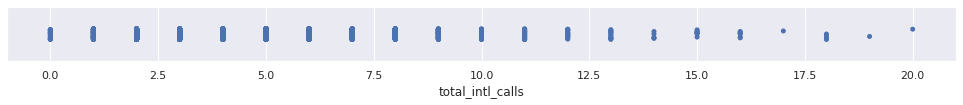

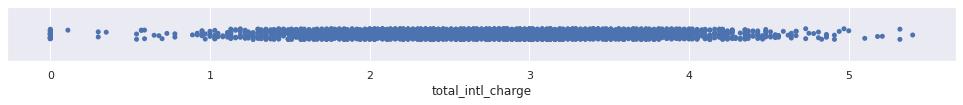

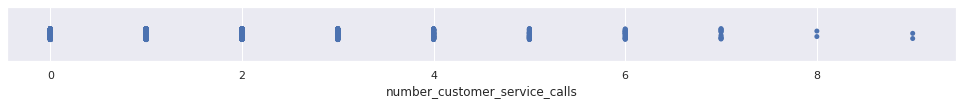

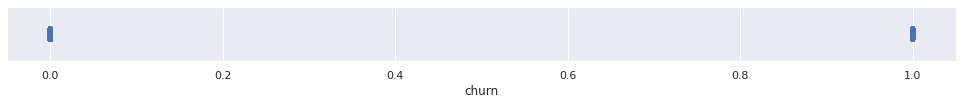

In [ ]:
#output strip plot untuk setiap numerical column pada dataset
mydata=df.select_dtypes(exclude=['object','bool'])
for column in mydata:
        plt.figure(figsize=(17,1))
        sns.stripplot(data=mydata, x=column)
plt.show()

Bivariat Analisis 

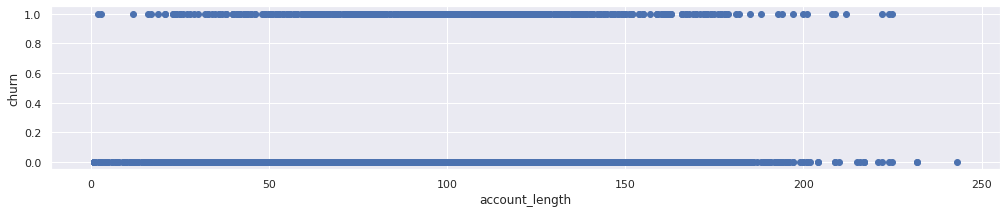

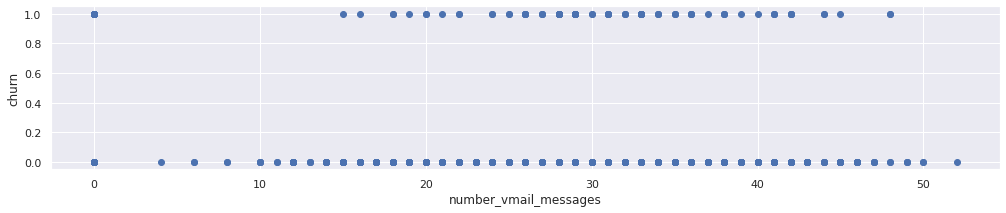

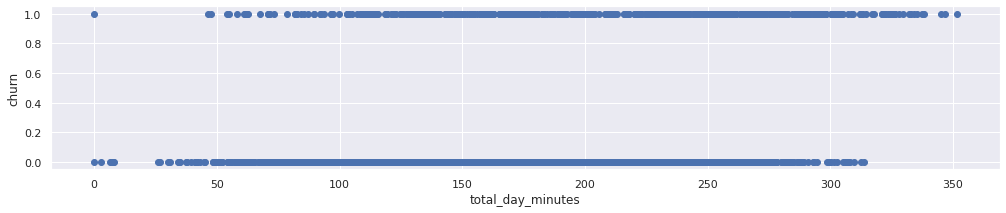

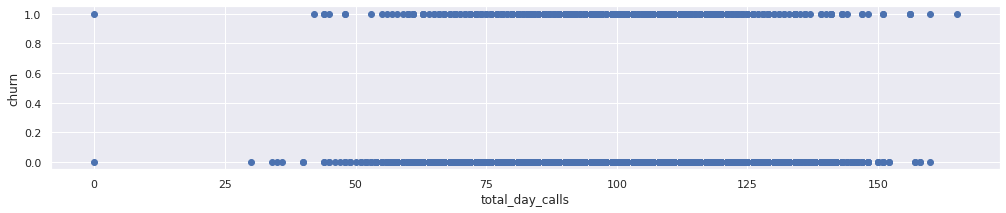

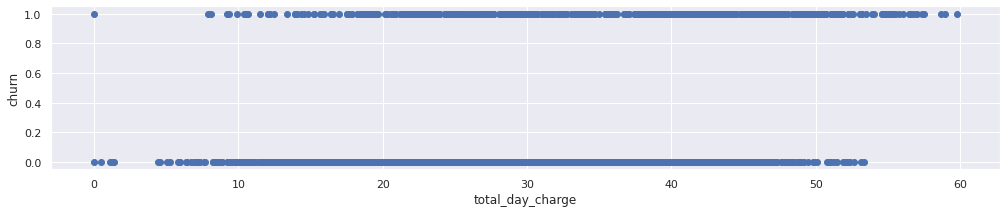

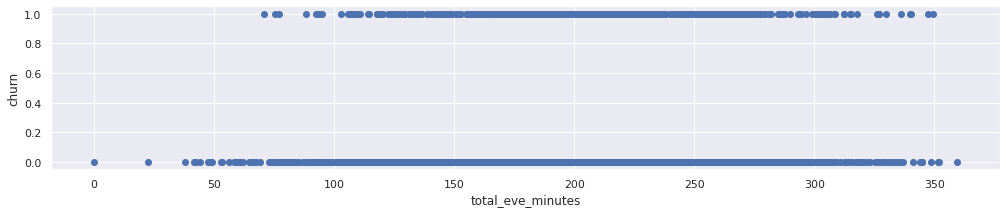

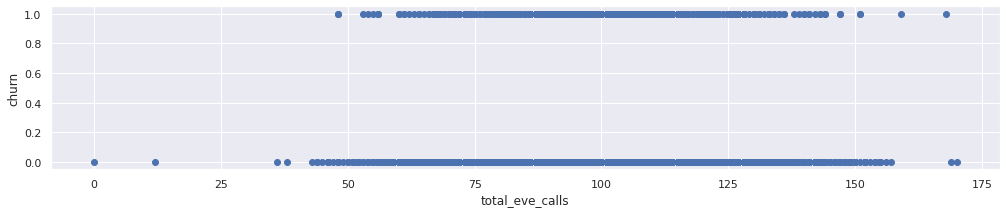

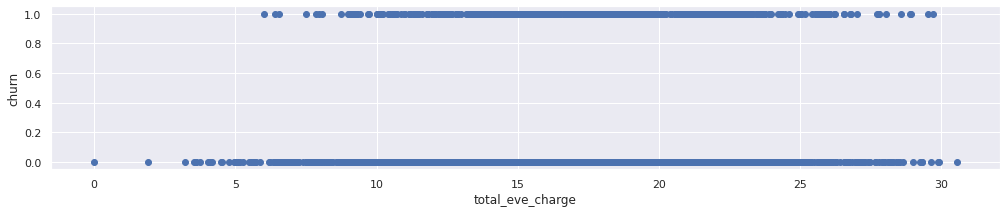

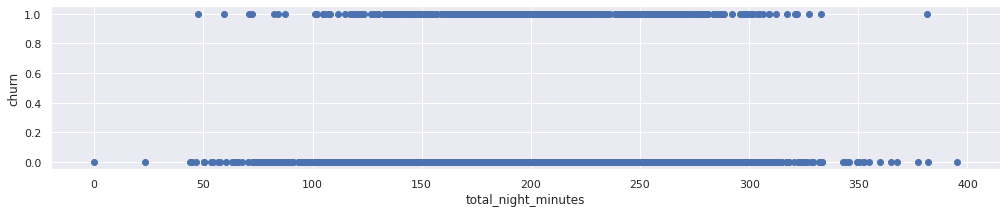

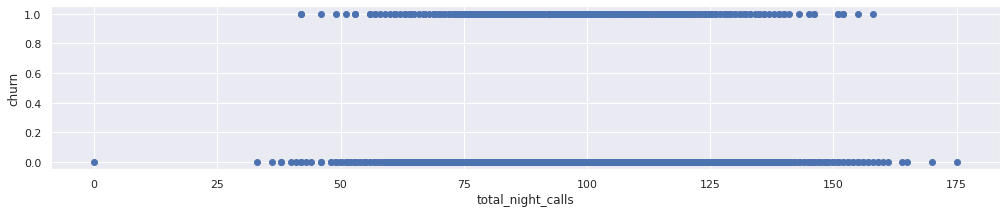

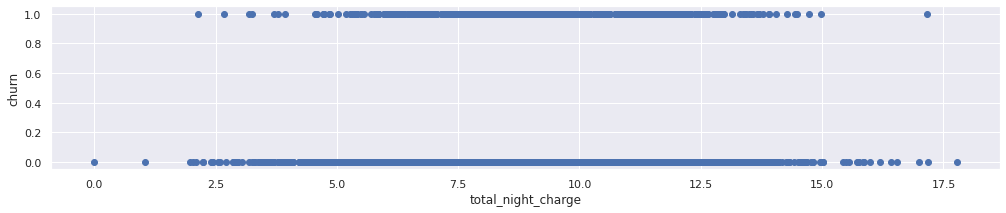

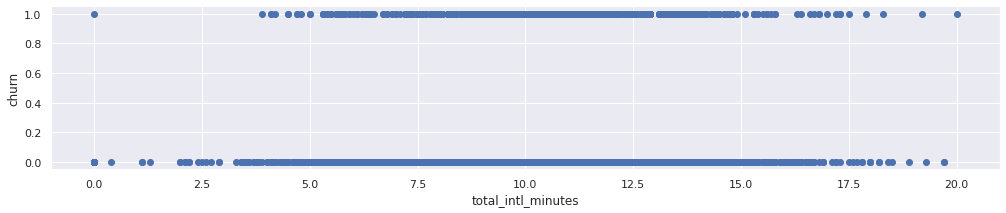

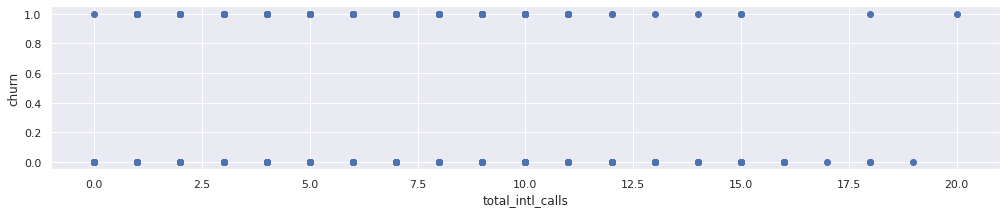

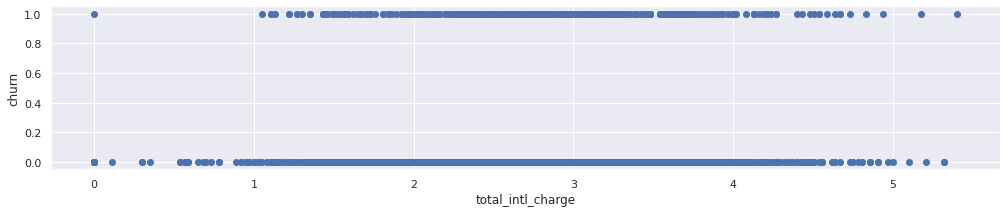

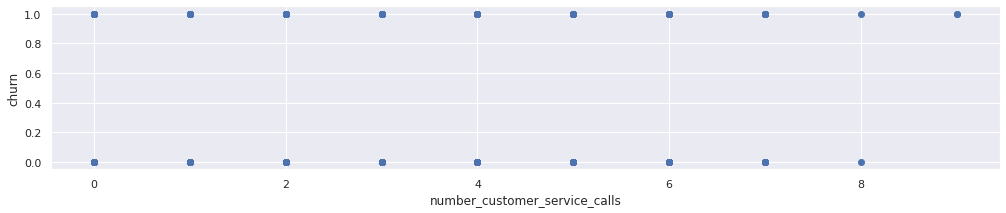

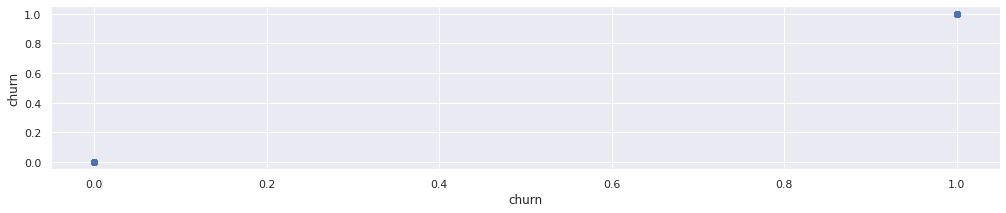

In [ ]:
# Plot boxplot untuk target churn column  pada setiap numerical feature pada data set
df2= df.describe().columns
for col in df2:
  fig=plt.figure(figsize=(17,3))
  ax=fig.gca()
  feature=df[col]
  label=df['churn']
  correlation= feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.xlabel(col)
  plt.ylabel('churn')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

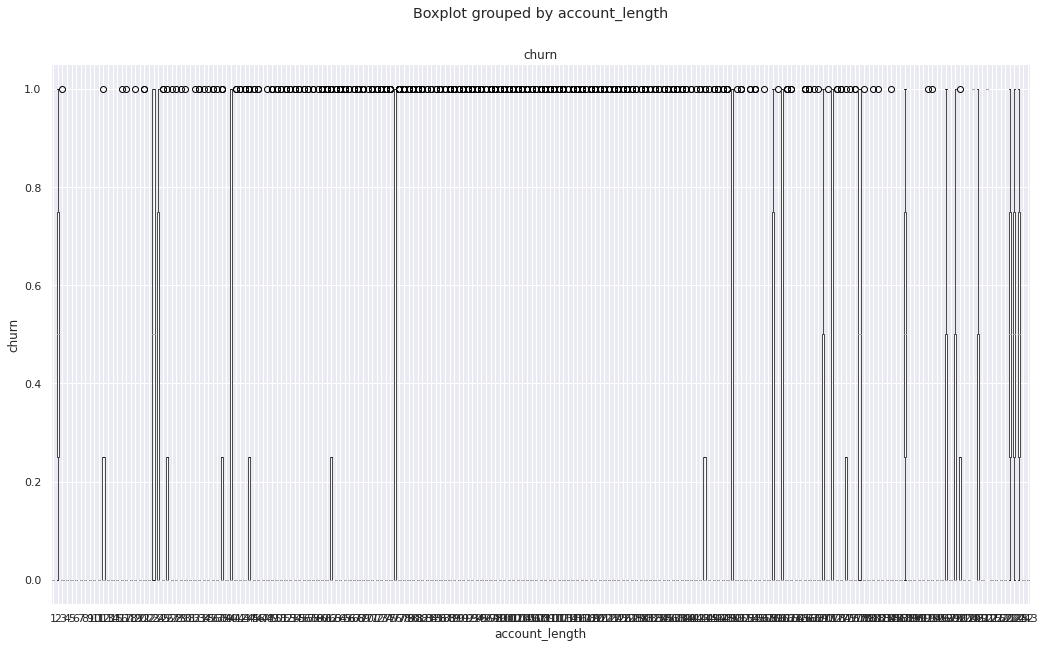

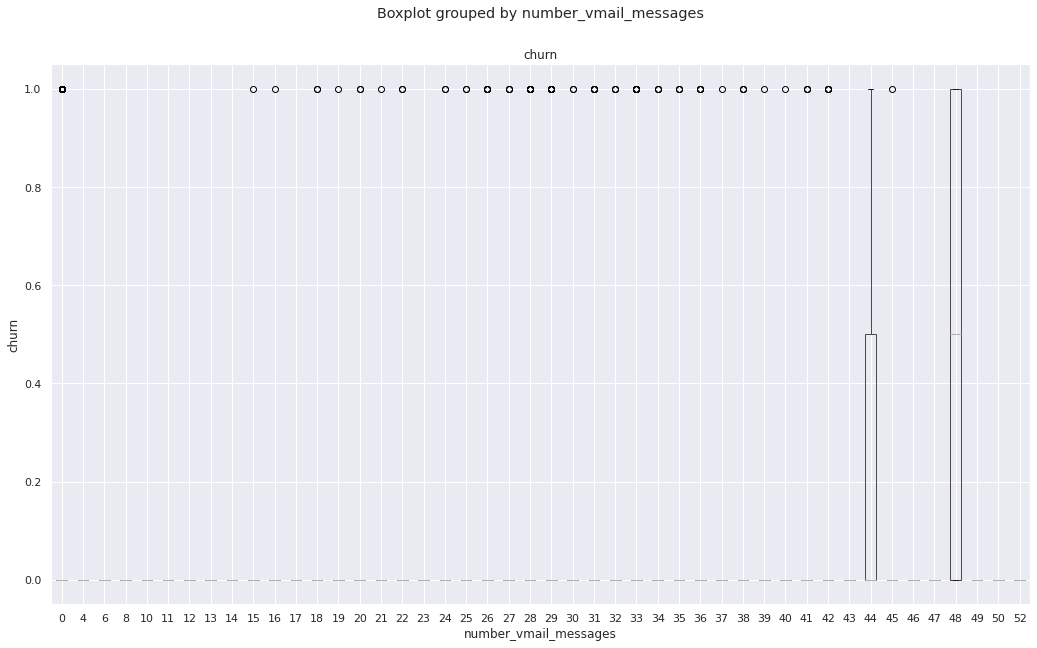

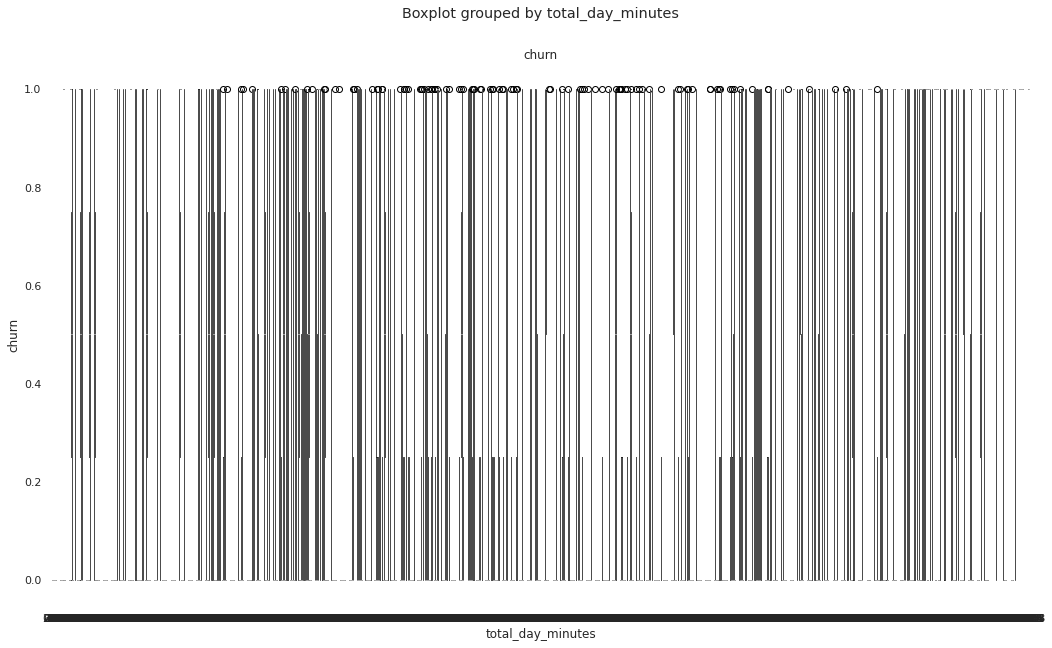

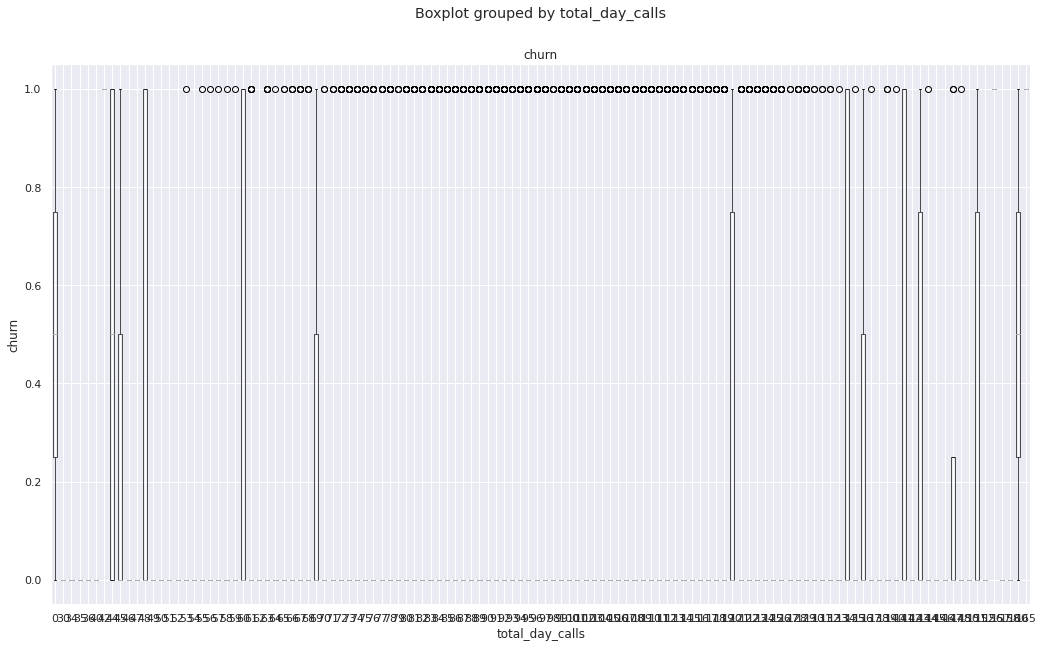

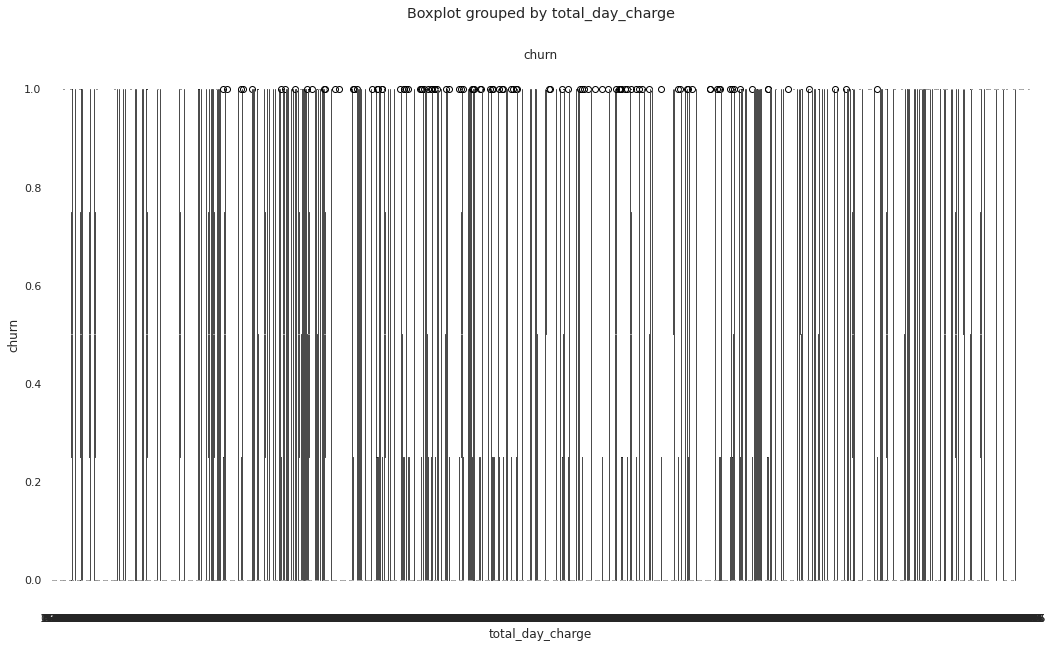

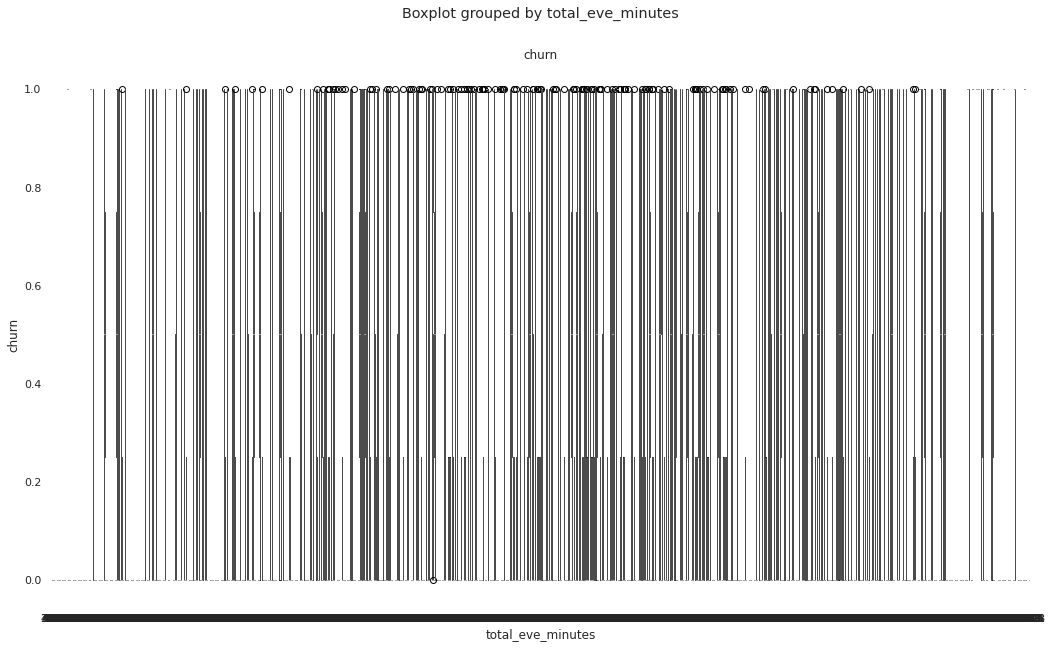

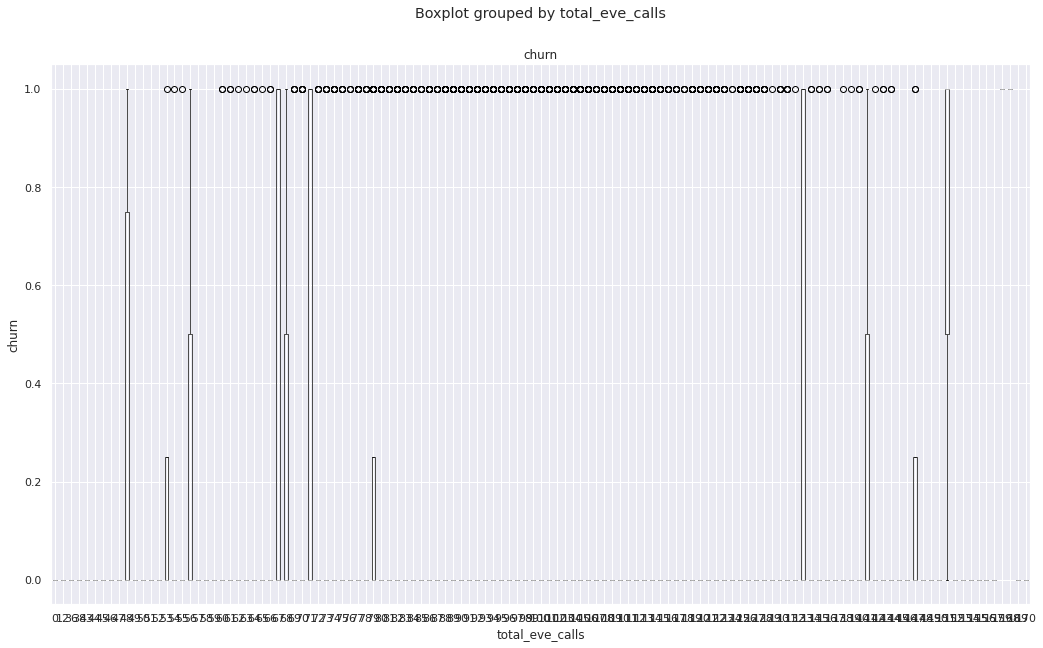

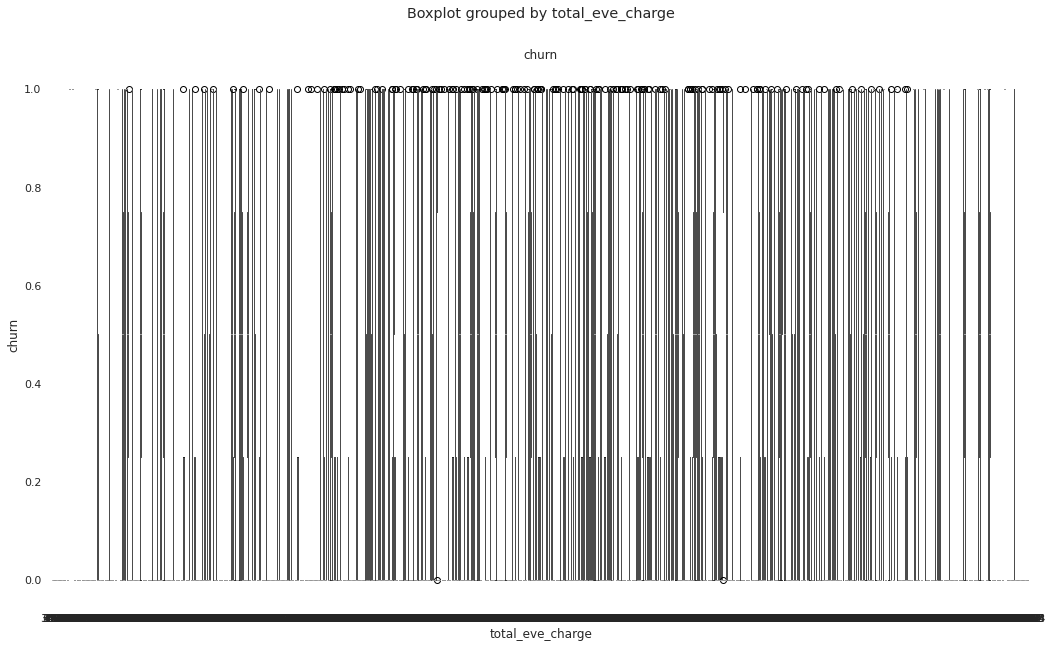

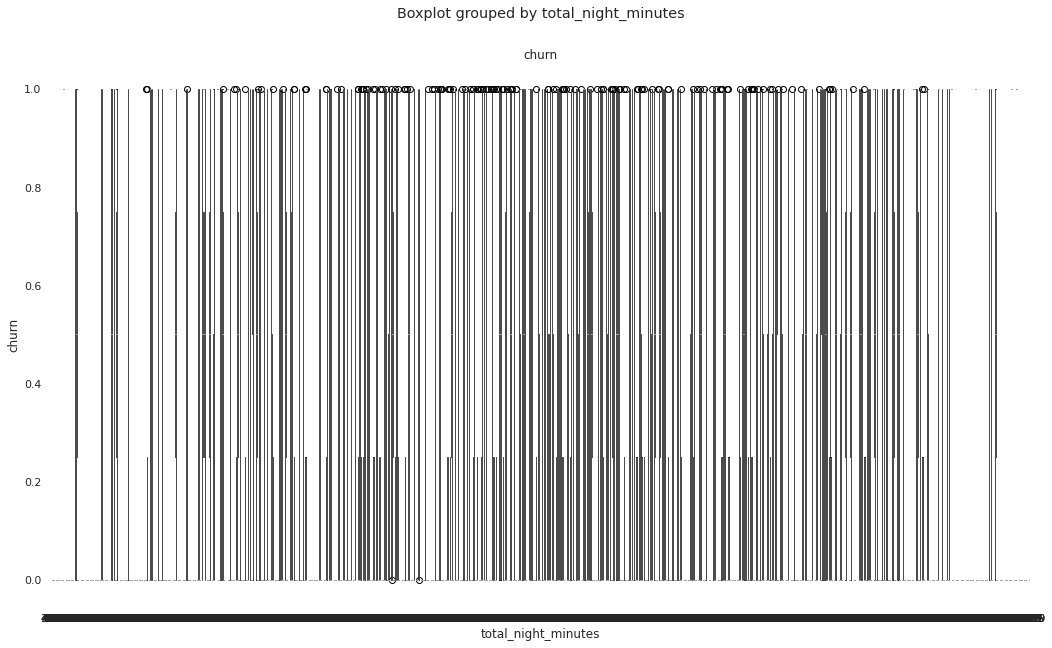

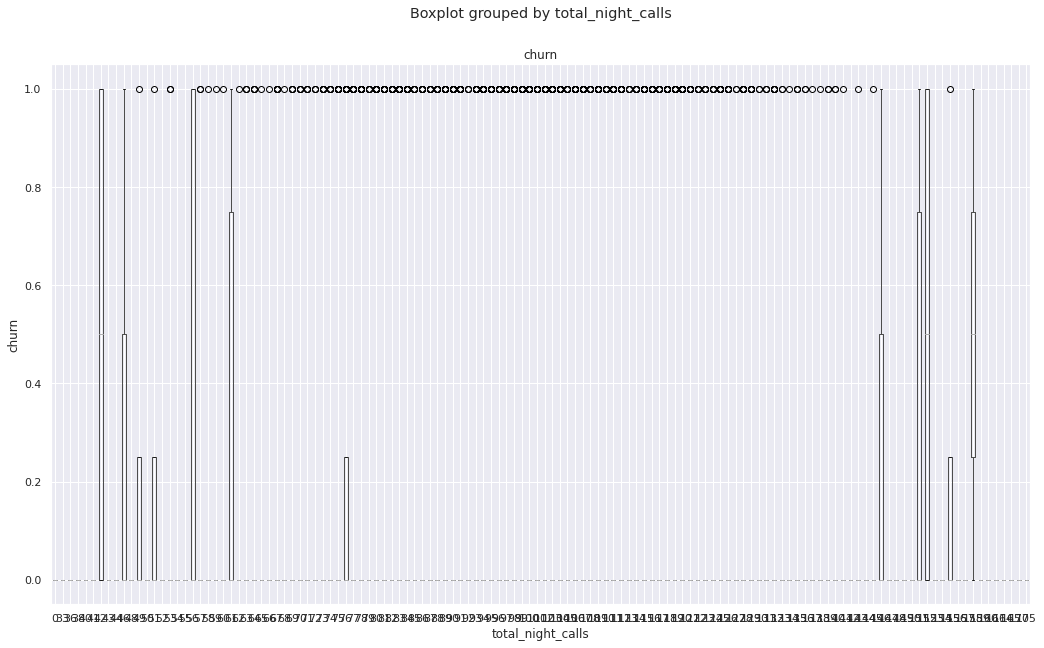

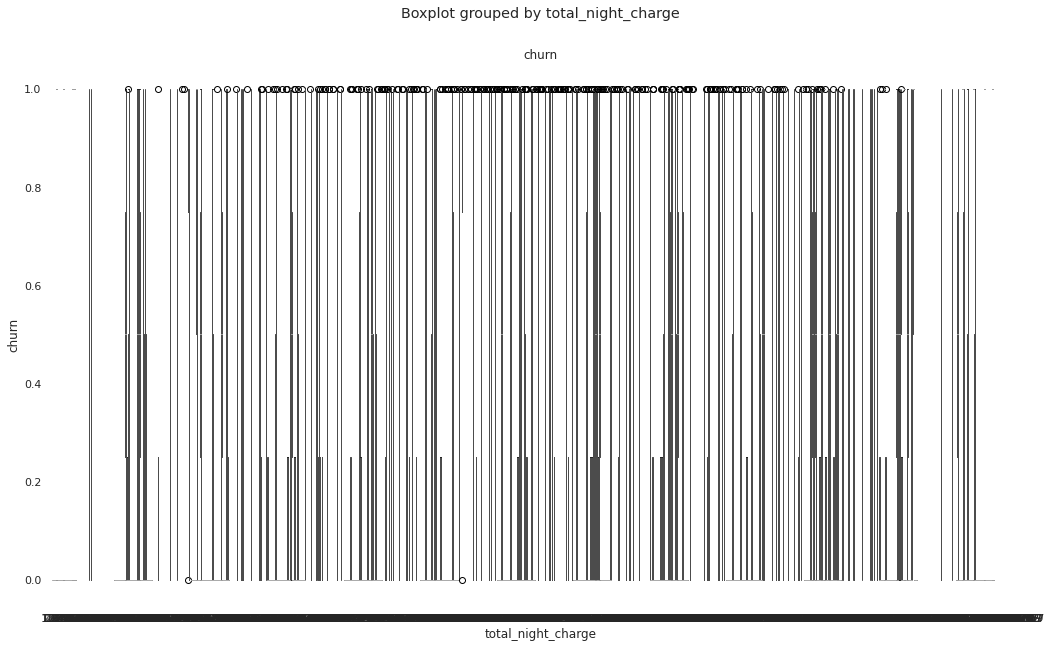

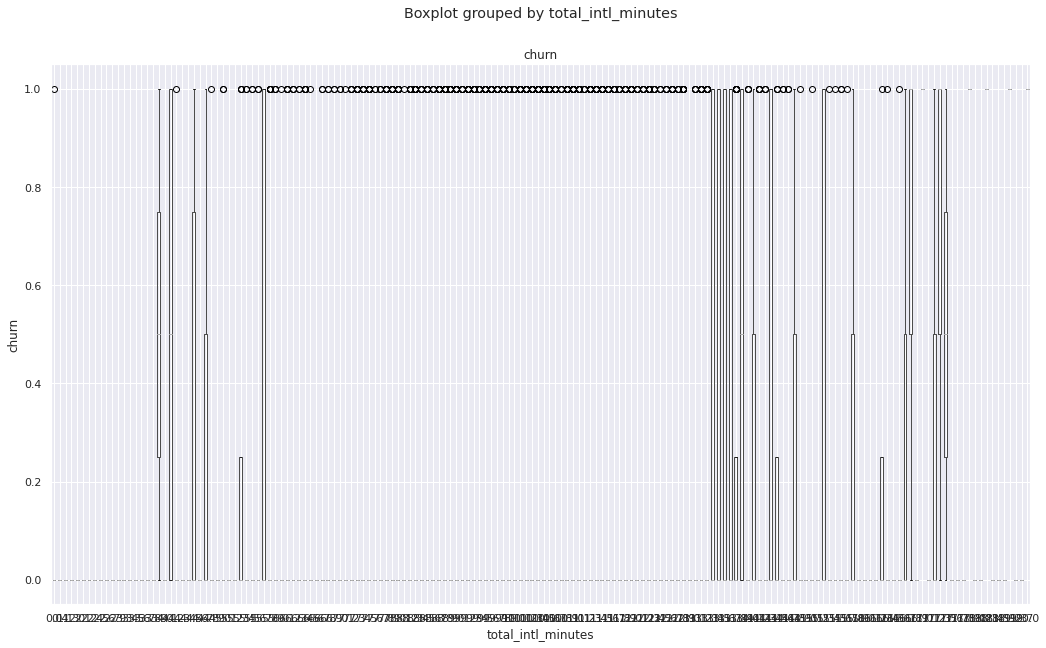

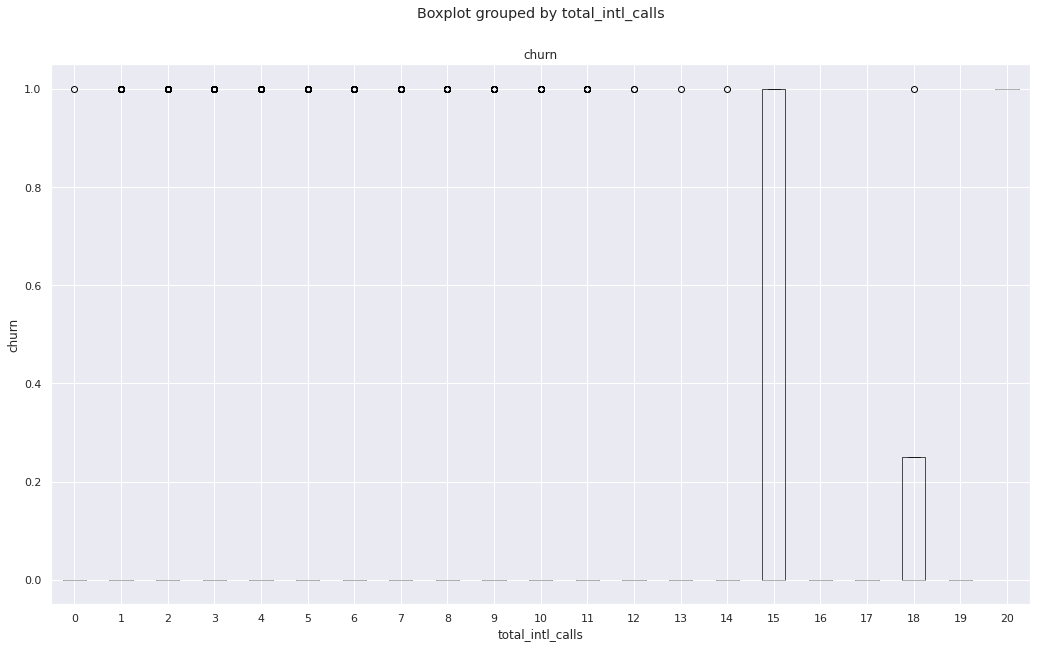

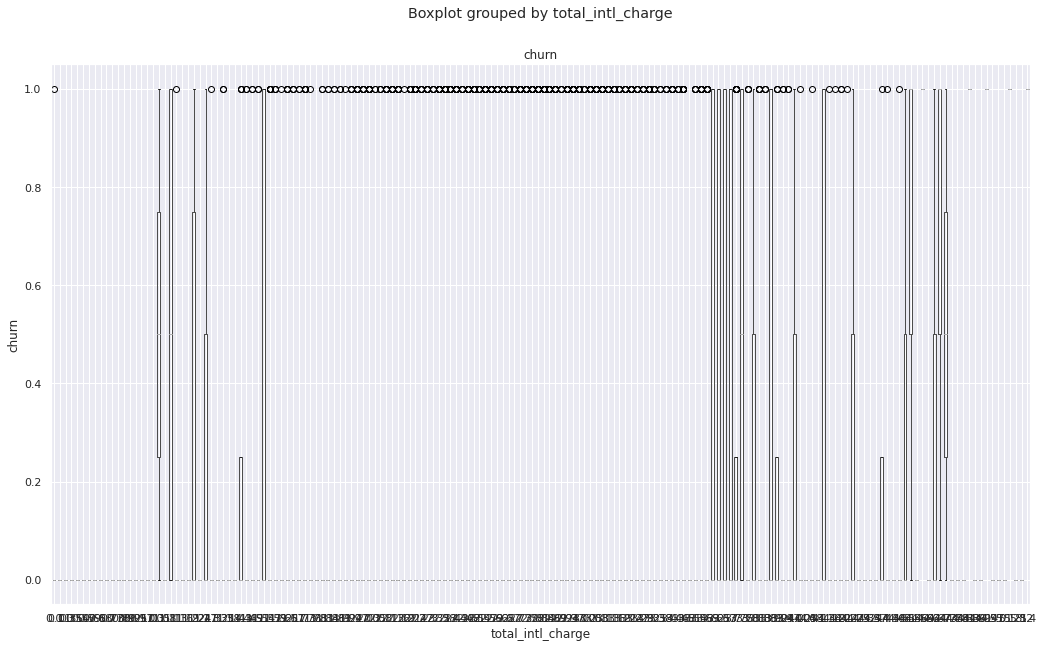

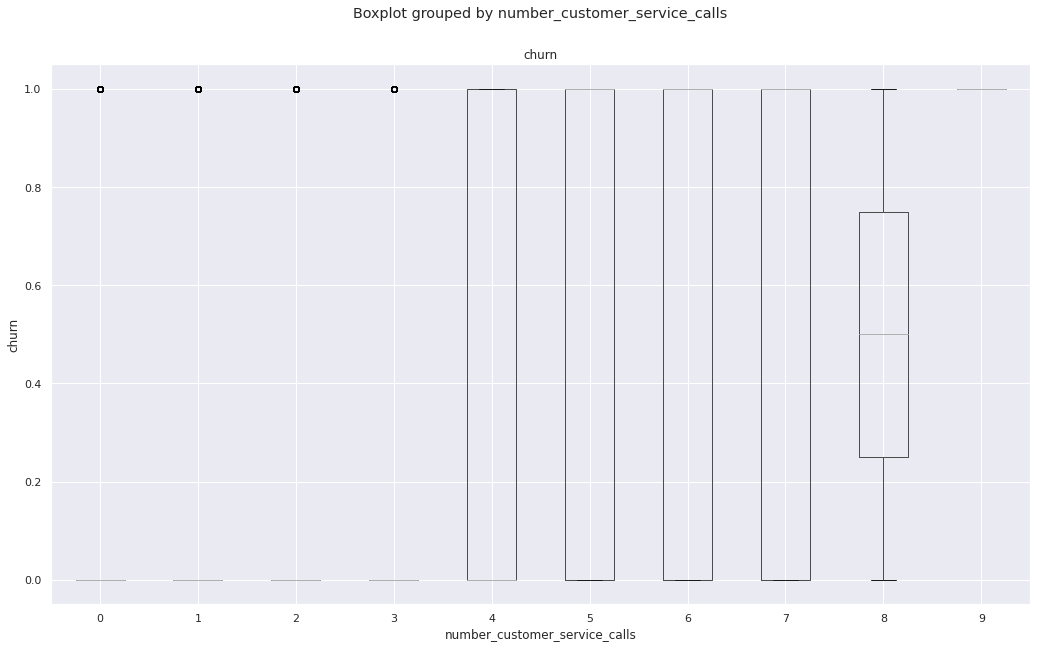

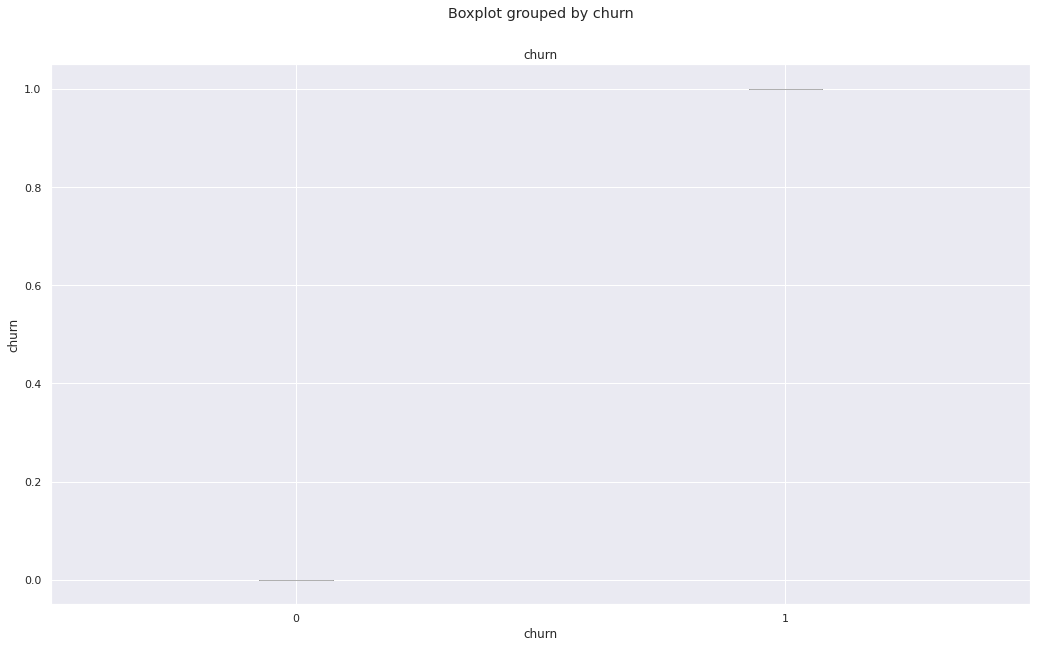

In [ ]:
#Plot box plot untuk target churn vs semua numerical column
for col in df2:
  fig=plt.figure(figsize=(17,10))
  ax=fig.gca()
  #feature=telecom_df[col]
  #label=telecom_df['Churn']
  df.boxplot(column = 'churn', by = col, ax = ax)
  plt.xlabel(col)
  plt.ylabel('churn')
plt.show()

Multivariat Analisis

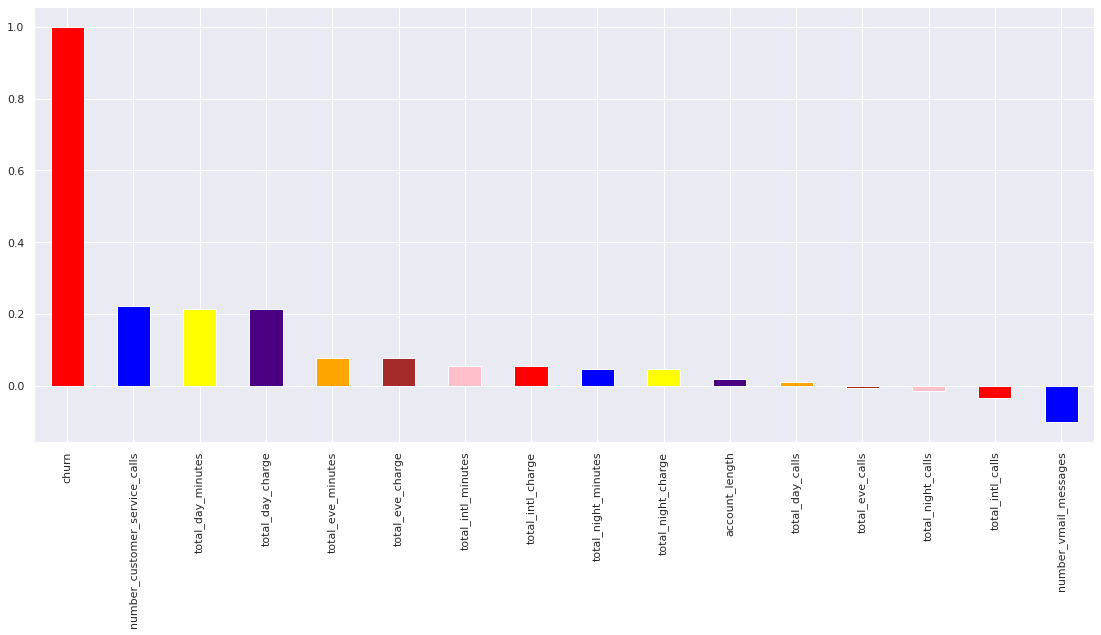

In [ ]:
# visualization using correlation plot
plt.figure(figsize=(19,8))
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar',color = ['red','blue','yellow','indigo','orange','brown','pink'])

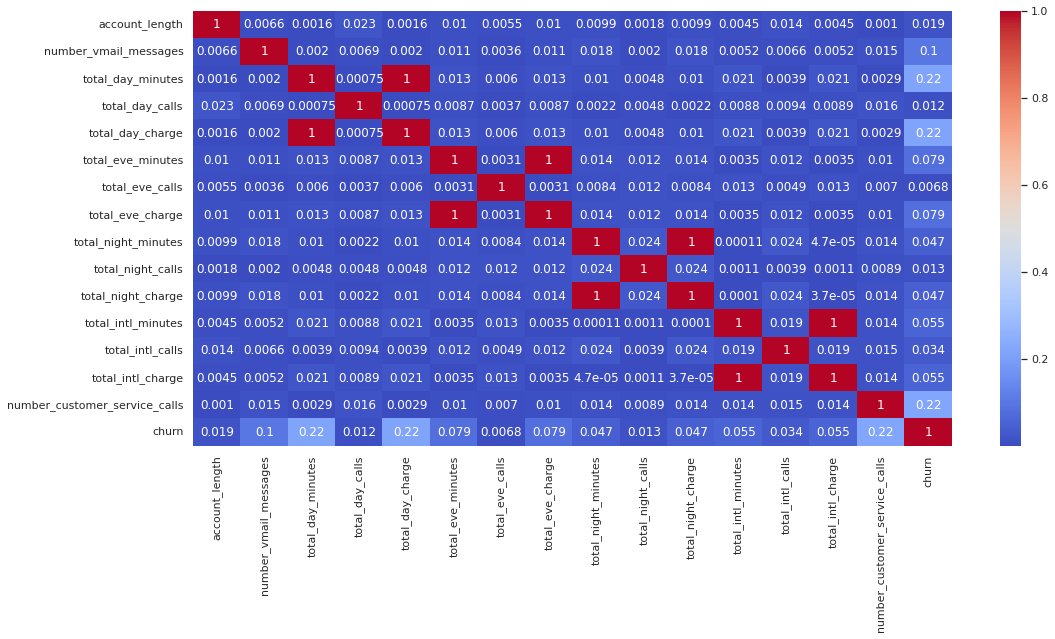

In [ ]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

Text(0.5, 1.0, 'Correlation Heatmap')

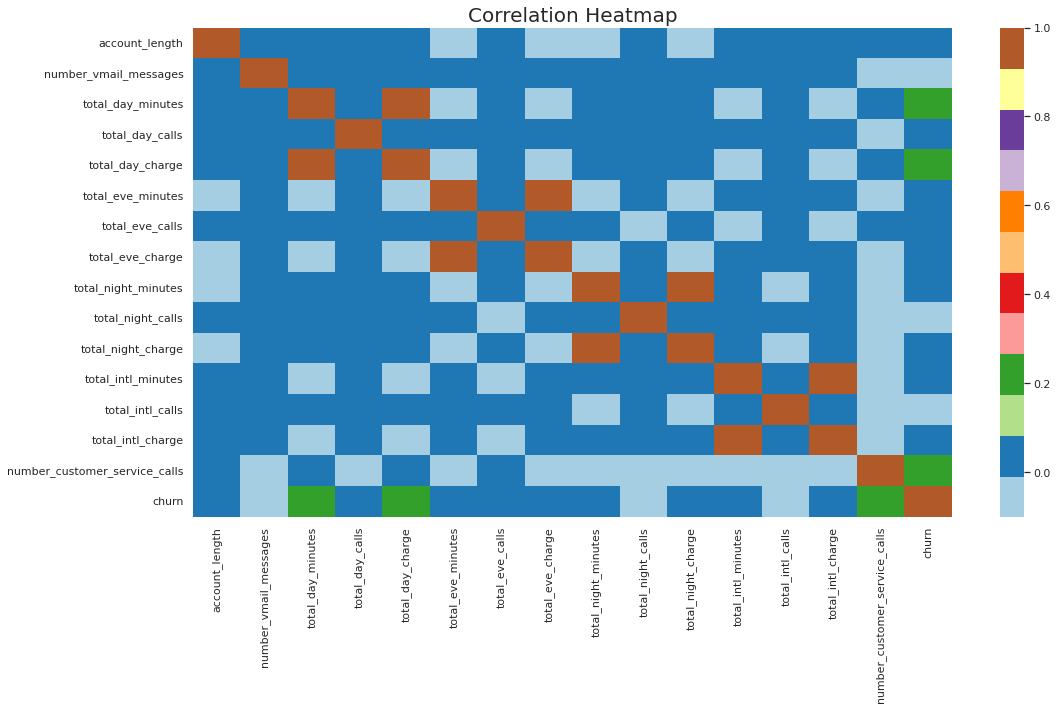

In [ ]:
#correlation heatmap
#Assigning true=1 and False=0 to churn variable
df['churn'] = df['churn'].replace({bool(True):1,bool(False):0})
plt.figure(figsize=(17,9))
sns.heatmap(df.corr(), cmap="Paired",annot=False)
plt.title("Correlation Heatmap", fontsize=20)

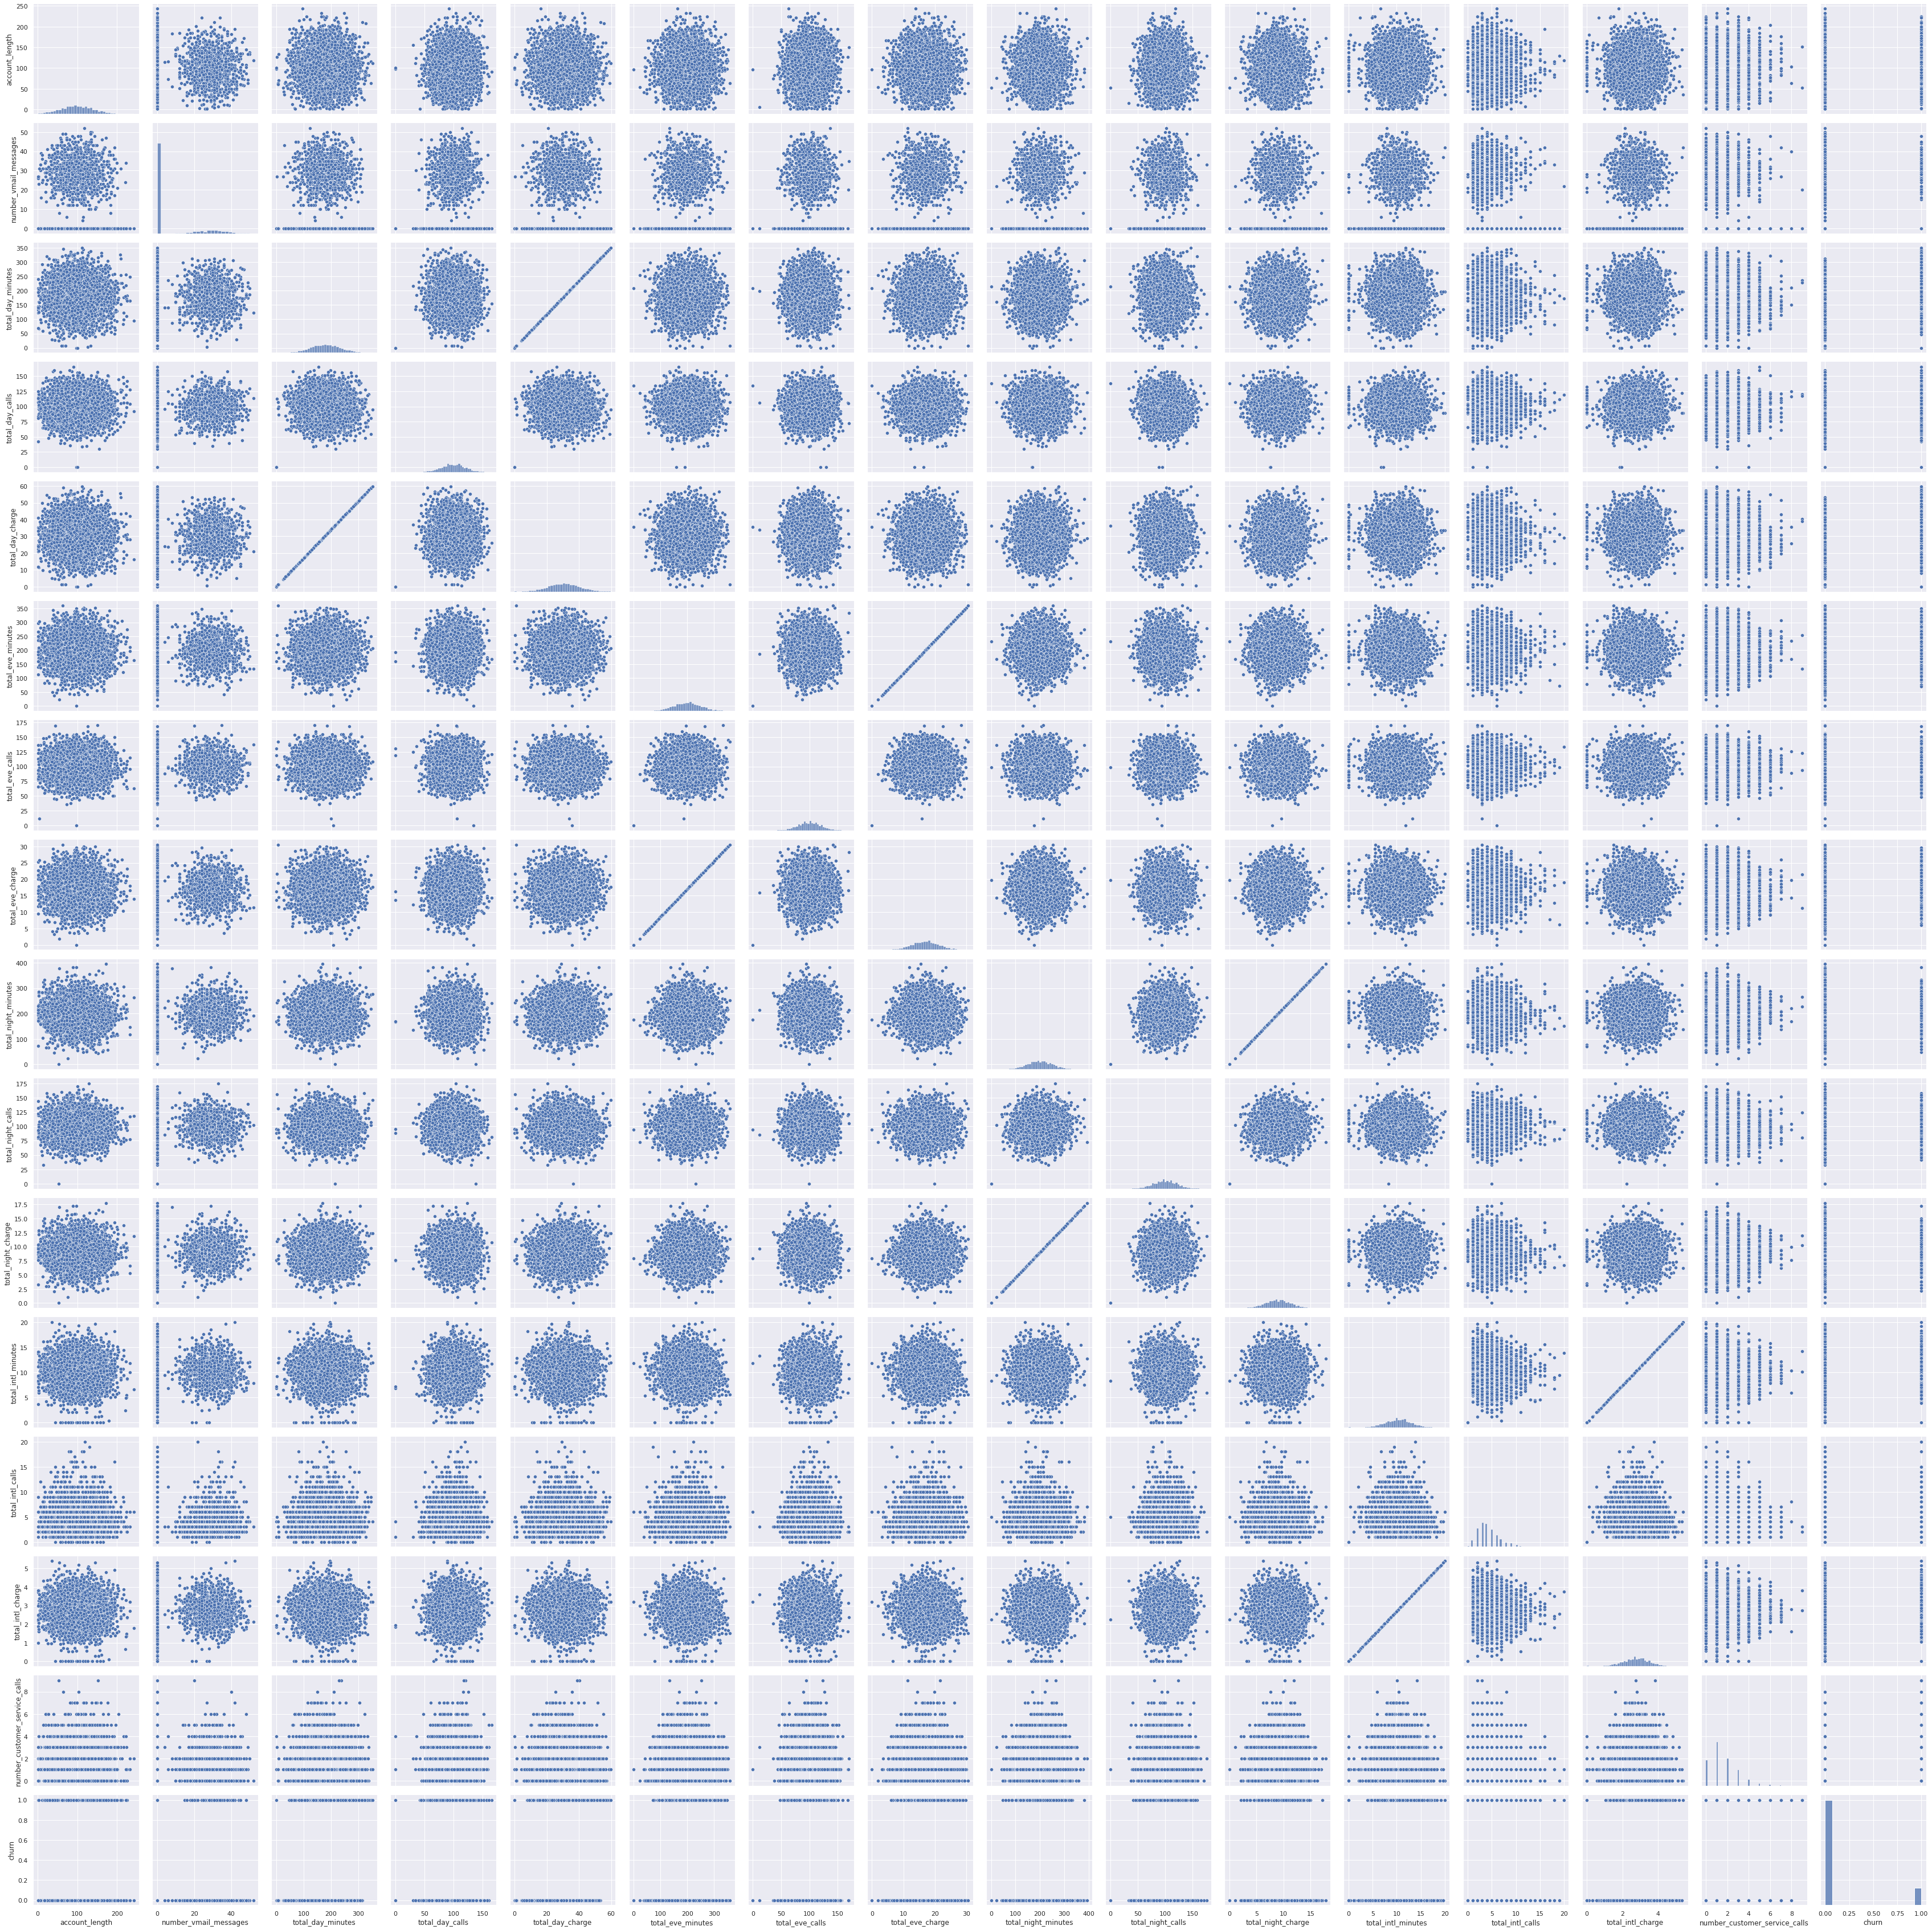

In [ ]:
#pair plot untuk semua coloumn
sns.pairplot(df, height=3)

Simpulan :
Hasil analisa untuk customer yang churn: 

*   Terdapat beberapa negara bagian yang menunjukan tingkat churn tinggi, hal ini kemungkinan disebabkan adanya jangkauan jaringan yang rendah.
*   Kode area dan panjang akun tidak memiliki peran terhadap target yaitu Churn sehingga ini kolom bisa dikatakan berlebihan.
*   Pada paket Internatioanl pelanggan cukup tinggi tetapi dengan biaya yang cukup tinggi juga hal ini menyebabkan juga terhadap jumlah churn yang di mana pelanggan tidak puas dengan problem biaya tinggi dan connection.
*   Pada messages voice mail ini, jika ada 20 pesan atau bahkan lebih maka akan terjadi churn kemungkinan ini disebabkan adanya kualitas voice mail yang kung baik.
*   Dalam data panggilan paket international menunjukan tingkat churn yang tinggi. Dan data panggilan layanan pelanggan juga setiap adanya pelanggan yang tidak puas menelpon pusat layanan yang di mana dapat menyebabkan penghentiannya tinggi di mana pusat layanan tidak menyelesaikan masalah pelanggan.


Yang perlu di benahi:


*   Benahi setiap jangkuan jaringan pada setiap negara bagian.
*  Benahi untuk messages voice mail untuk memperoleh feedback dari pelanggan
*   Benahi setiap pusat layanan dan mampu menyelesaikan problem dari setiap pelanggan. 














**Data Preprocessing**


In [ ]:
#Function for categorical dan numerical
def get_cat_cols(df):
    num=list(df.columns[df.dtypes=='object'])
    return num
    
def get_num_cols(df):
    cat=list(df.columns[df.dtypes=='int64'])+list(df.columns[df.dtypes=='int32'])+list(df.columns[df.dtypes=='float64'])
    return cat

In [ ]:
#define target variable
target_variable = 'churn'

df[target_variable].value_counts(normalize=True)

0    0.859294
1    0.140706
Name: churn, dtype: float64

In [ ]:
#Numerical variable distribution
num_col = get_num_cols(df.drop(target_variable, axis=1))
num_col

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_eve_calls',
 'total_night_calls',
 'total_intl_calls',
 'number_customer_service_calls',
 'total_day_minutes',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_charge']

In [ ]:
#Categorical feature distribution
cat_col = get_cat_cols(df)
cat_col

['state', 'area_code', 'international_plan', 'voice_mail_plan']

**Feature Selection**

In [ ]:
#import library
from sklearn.preprocessing import MinMaxScaler  

#normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(df[num_col])

#buatkan dan simpan pada tabel gunakan pd.Dataframe
X_transform = pd.DataFrame(X_transform,columns = num_col)
X_transform.head()

account_length  number_vmail_messages  total_day_calls  total_eve_calls  \
0        0.438017               0.500000         0.745455         0.605882   
1        0.561983               0.000000         0.690909         0.647059   
2        0.342975               0.000000         0.430303         0.517647   
3        0.305785               0.000000         0.684848         0.717647   
4        0.495868               0.461538         0.533333         0.635294   

   total_night_calls  total_intl_calls  number_customer_service_calls  \
0           0.588571              0.15                       0.111111   
1           0.594286              0.25                       0.000000   
2           0.508571              0.35                       0.222222   
3           0.691429              0.15                       0.333333   
4           0.674286              0.35                       0.333333   

   total_day_minutes  total_day_charge  total_eve_minutes  total_eve_charge  \
0           0.459744          0.459672           0.544114          0.544204   
1           0.692461          0.692436           0.337323          0.337263   
2           0.851778          0.851740           0.172279          0.172233   
3           0.474253          0.474230           0.412747          0.412901   
4           0.620768          0.620649           0.969942          0.969876   

   total_night_minutes  total_night_charge  total_intl_minutes  \
0             0.644051            0.644344               0.685   
1             0.411646            0.411930               0.610   
2             0.498481            0.498593               0.330   
3             0.473165            0.473270               0.505   
4             0.538228            0.538548               0.375   

   total_intl_charge  
0           0.685185  
1           0.609259  
2           0.329630  
3           0.505556  
4           0.375926

In [ ]:
#label encoding data
#import Laber Encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
mydata1=df.copy()
mydata1.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls  churn  
0                              1      0  
1                              0      0  
2                              2      0  
3                              3      0  
4                              3      0

In [ ]:
#new_df = pd.concat([X_transform, df[cat_col], 
                    #df[target_variable]], axis=1)
#new_df.shape

#print(new_df.head())

#Remove the unnecessary columns state & area code

new_df = mydata1.drop(['state','area_code', 'account_length'], axis=1)
print(new_df.head())

  international_plan voice_mail_plan  number_vmail_messages  \
0                 no             yes                     26   
1                 no              no                      0   
2                yes              no                      0   
3                yes              no                      0   
4                 no             yes                     24   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              161.6              123             27.47              195.5   
1              243.4              114             41.38              121.2   
2              299.4               71             50.90               61.9   
3              166.7              113             28.34              148.3   
4              218.2               88             37.09              348.5   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0              103             16.62                254.4               

In [ ]:
#konversi semua variabel tipe categorical ke tipe numerical  
for column in new_df.columns:
    if new_df[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel categorical
    new_df[column] = LabelEncoder().fit_transform(new_df[column])
print(df.head()) #salah print seharusnya new_df outputnya 

  state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


**Splitting Dataset**

Tahap selanjutnya yaitu splitting dataset di mana membagi dataset menjadi data training dan juga data testing. Data yang akan digunakan merupakan data dari hasil analisa sebelumnya new_df dengan porsi 80% data train dan 20% data testing serta berdasarkan dengan variabel predictor (X) dan target (Y). Menggunakan tarin_test_split() untuk membagi dataset tersebut.

In [ ]:
#predictor dan target
X = new_df.drop(target_variable, axis=1)
y = new_df[[target_variable]]

print("predictor (X) Shape ->",X.shape)
print("Target(y) Shape ->",y.head())

predictor (X) Shape -> (4250, 16)
Target(y) Shape ->    churn
0      0
1      0
2      0
3      0
4      0


In [ ]:
#splitting data (80% dan 20%)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, random_state=13)


# Print output dari masing-masing jumlah baris dan kolom pada data train dan test
print("Jumlah baris dan kolom dari x_train adalah:", x_train.shape,", sedangkan Jumlah baris dan kolom dari y_train:", 
      y_train.shape)
print("Presentase Churn di data Train:")
print(y_train.value_counts(normalize=True))
print("Jumlah baris dan kolom dari x_test adalah:", x_test.shape,", sedangkan Jumlah baris dan kolom dari y_test :", 
      y_test.shape)
print("Presentase Churn di data Test:")
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (3400, 16) , sedangkan Jumlah baris dan kolom dari y_train: (3400, 1)
Presentase Churn di data Train:
churn
0        0.860588
1        0.139412
dtype: float64
Jumlah baris dan kolom dari x_test adalah: (850, 16) , sedangkan Jumlah baris dan kolom dari y_test : (850, 1)
Presentase Churn di data Test:
churn
0        0.854118
1        0.145882
dtype: float64


Skenario tanpa Resamplimg

In [ ]:
#build model menggunakan LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

clf = LogisticRegression(random_state=13)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy is ', accuracy_score(y_test, y_pred))

Accuracy is  0.8529411764705882


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       726
           1       0.44      0.03      0.06       124

    accuracy                           0.85       850
   macro avg       0.65      0.51      0.49       850
weighted avg       0.80      0.85      0.79       850



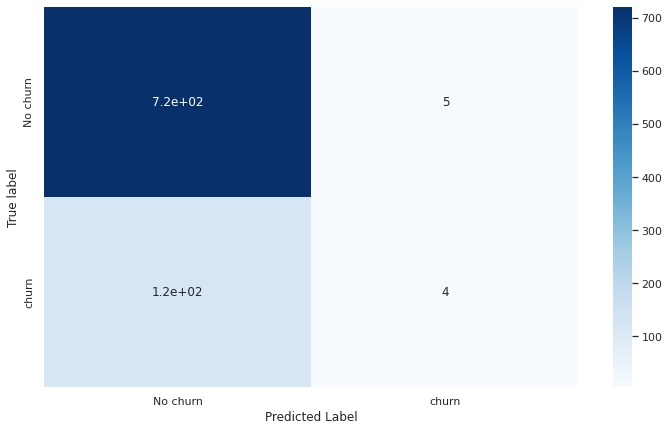

In [ ]:
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=['No churn', 'churn'], index=['No churn', 'churn'])
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted Label'
sns.heatmap(df_cm, cmap='Blues', annot=True)

Dari hasil tampilan confusion matrix dan ingin memprioritaskan hasil dari Churn hasil dapat dikatakan kurang baik, hal tersebut dapat dilihat dari hasil Fscore nya hanya memperoleh 0.06. Untuk hal itu maka akan dilakukan over sampling atau pun under sampling untuk menangani masalah tersebut.

Skenario menggunakan Resampling 

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=13)
X_res, y_res = sm.fit_resample(x_train, y_train)
print("Original dataset shape is", Counter(y_train))
print("Resample dataset shape is", Counter(y_res))

Original dataset shape is Counter({'churn': 1})
Resample dataset shape is Counter({'churn': 1})


In [ ]:
clf = LogisticRegression(random_state=13)
clf.fit(X_res, y_res)
y_pred = clf.predict(x_test)
print("Acuracy --", accuracy_score(y_test, y_pred))

Acuracy -- 0.6776470588235294


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

           0       0.93      0.67      0.78       726
           1       0.27      0.73      0.40       124

    accuracy                           0.68       850
   macro avg       0.60      0.70      0.59       850
weighted avg       0.84      0.68      0.72       850



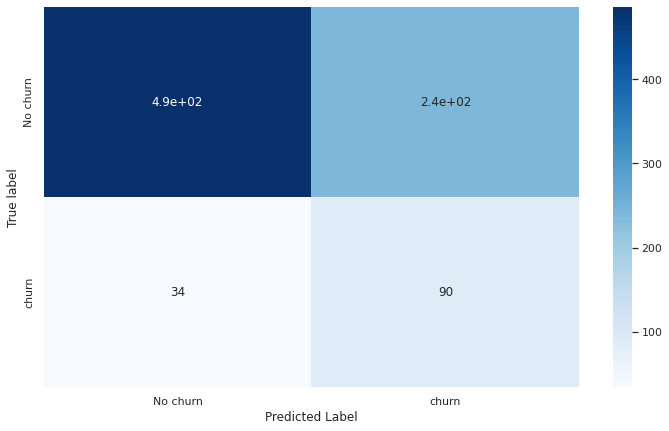

In [ ]:
print(classification_report(y_test, y_pred))
cf_matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cf_matrix, columns=['No churn', 'churn'], index=['No churn', 'churn'])
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted Label'
sns.heatmap(df_cm, cmap='Blues', annot=True)

Dari hasil confusion matrix sebelumnya yang memperoleh hasil kurang baik, kini memperoleh hasil yang meningkat pada 0.40 dapat dikatakan juga hasil ini modelnya cukup baik meningkat dengan adanya perubahan imbalanced data.

**Build model dengan beberapa Metode**

In [ ]:
#import library method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import random

In [ ]:
#balancing data use SMOTE (Over_sampling)
sm = SMOTE(random_state=13)
X_res, y_res = sm.fit_resample(x_train, y_train)
X_cv, y_cv = sm.fit_resample(x_test, y_test)

K Neighbors Classifier

In [ ]:
model = KNeighborsClassifier()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print(confusion_matrix(y_cv, y_predictions))

[[536 190]
 [291 435]]


In [ ]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       726
           1       0.70      0.60      0.64       726

    accuracy                           0.67      1452
   macro avg       0.67      0.67      0.67      1452
weighted avg       0.67      0.67      0.67      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


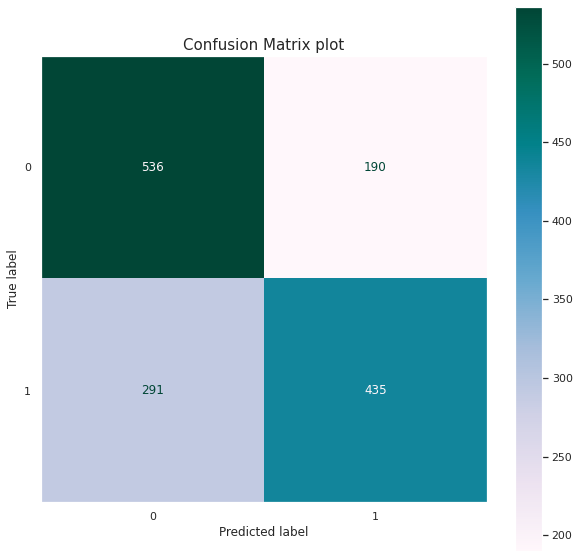

In [ ]:
#plot cunfusion matrix
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, 
                      y_cv, ax = ax, cmap = 'PuBuGn')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.7175170184185962


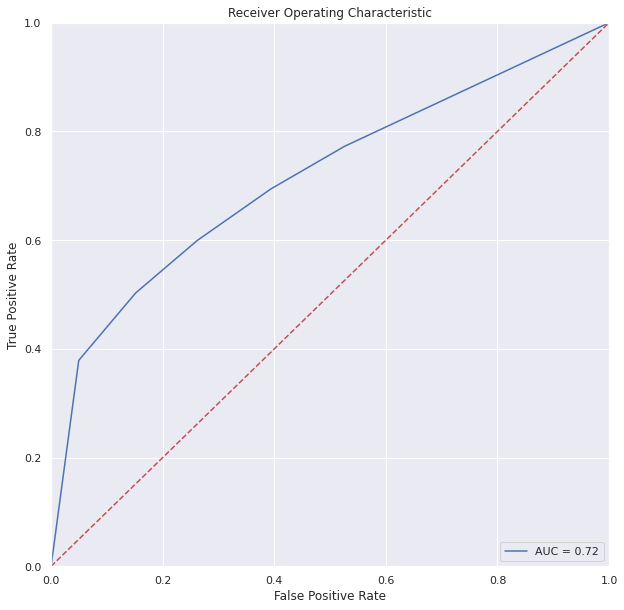

In [ ]:
#ROC AUC Curves

from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#plt.savefig('Machine Learning Plots/KNN AUC Plot.png')
plt.show()

Support Vector Classifier (SVM)

In [ ]:
model = SVC(probability = True)
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#confusion matrix
print(confusion_matrix(y_cv, y_predictions))

[[663  63]
 [342 384]]


In [ ]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.66      0.91      0.77       726
           1       0.86      0.53      0.65       726

    accuracy                           0.72      1452
   macro avg       0.76      0.72      0.71      1452
weighted avg       0.76      0.72      0.71      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


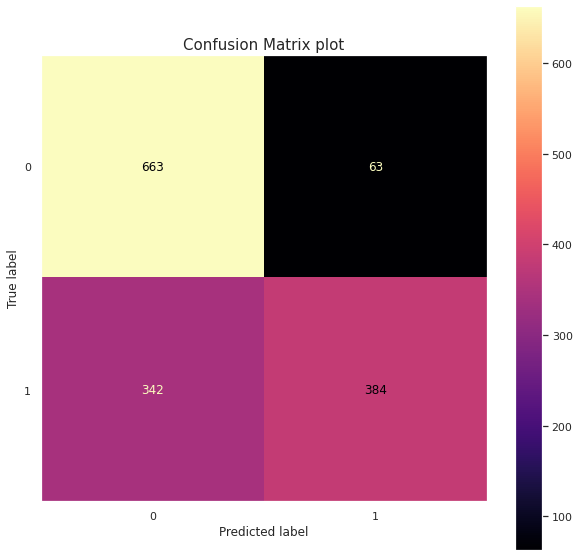

In [ ]:
#plot confusion matrix
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'magma')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.7565455456139152


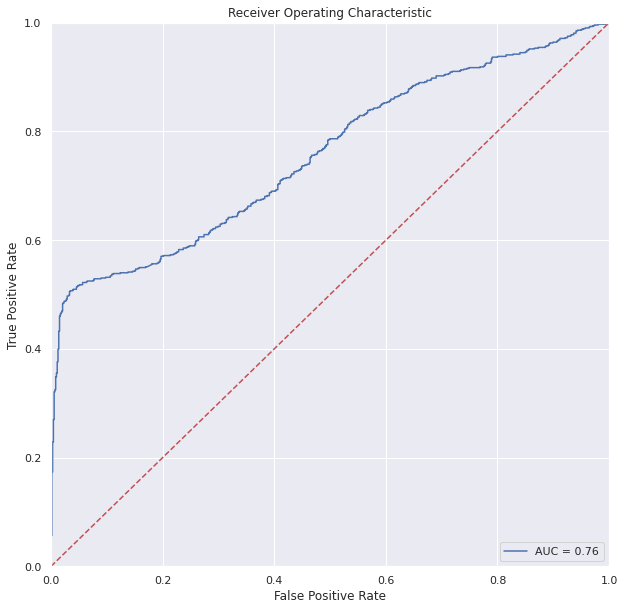

In [ ]:
#ROC AUC Curves
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(confusion_matrix(y_cv, y_predictions))

print(classification_report(y_cv, y_predictions))

[[486 240]
 [168 558]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       726
           1       0.70      0.77      0.73       726

    accuracy                           0.72      1452
   macro avg       0.72      0.72      0.72      1452
weighted avg       0.72      0.72      0.72      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


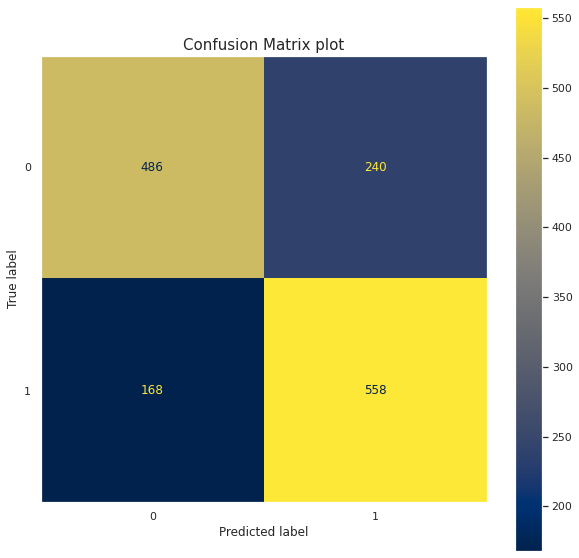

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'cividis')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
#plt.savefig('Machine Learning Plots/Logistic Regression Confusion Matrix.png')
plt.show()

AUC for our classifier is: 0.7860213707321146


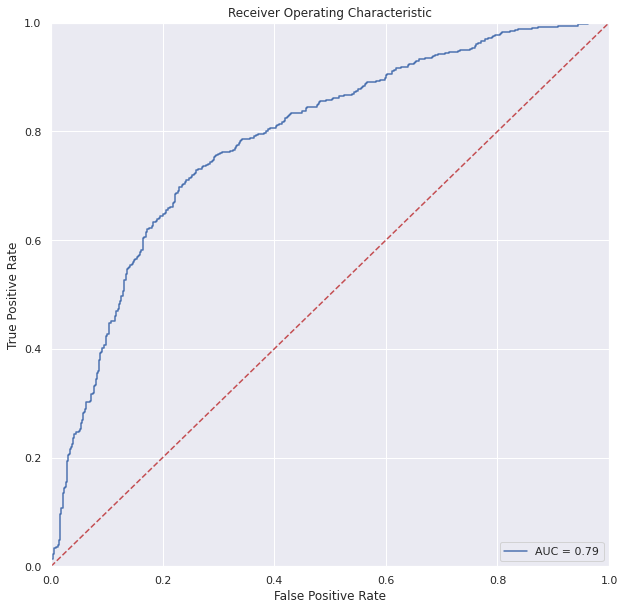

In [ ]:
#grafik ROC AUC Curves
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)


In [ ]:
print(confusion_matrix(y_cv, y_predictions))

[[635  91]
 [137 589]]


In [ ]:
print(classification_report(y_cv, y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       726
           1       0.87      0.81      0.84       726

    accuracy                           0.84      1452
   macro avg       0.84      0.84      0.84      1452
weighted avg       0.84      0.84      0.84      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


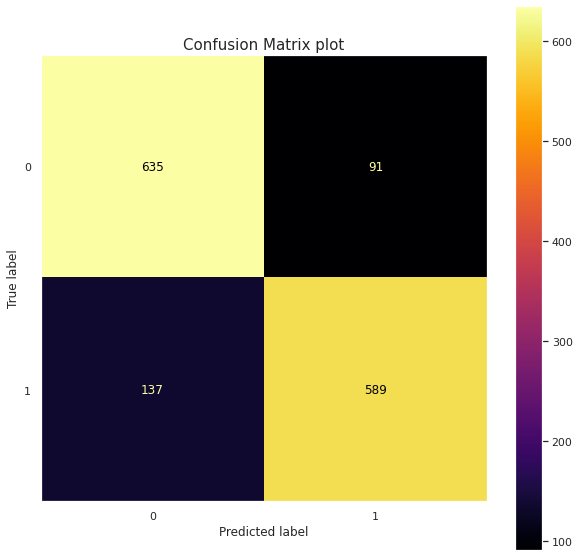

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'inferno')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
plt.show()

AUC for our classifier is: 0.8429752066115702


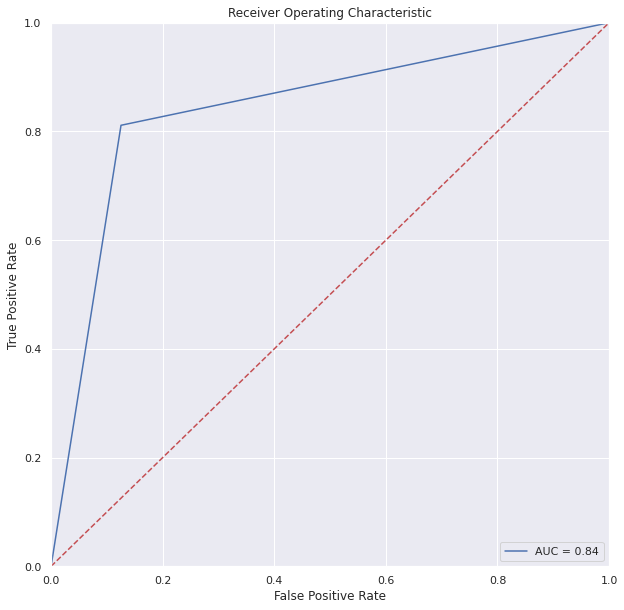

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Gaussian Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(confusion_matrix(y_cv, y_predictions))

print(classification_report(y_cv, y_predictions))

[[440 286]
 [123 603]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       726
           1       0.68      0.83      0.75       726

    accuracy                           0.72      1452
   macro avg       0.73      0.72      0.71      1452
weighted avg       0.73      0.72      0.71      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


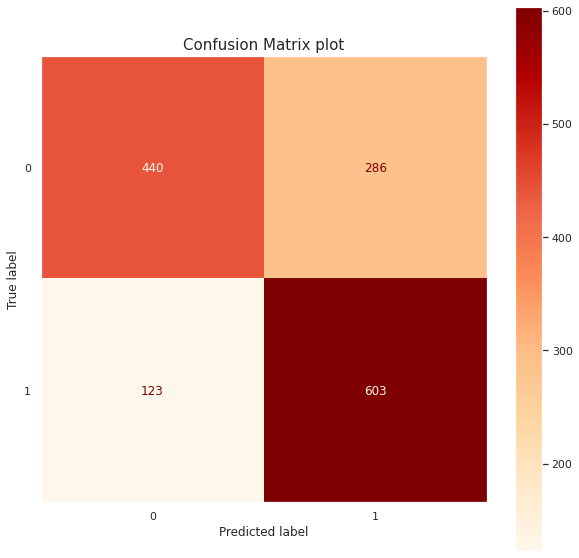

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'OrRd')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)
#plt.savefig("Machine Learning Plots/Naive Bayes Confusion Matrix.png")
plt.show()

AUC for our classifier is: 0.8306961424917849


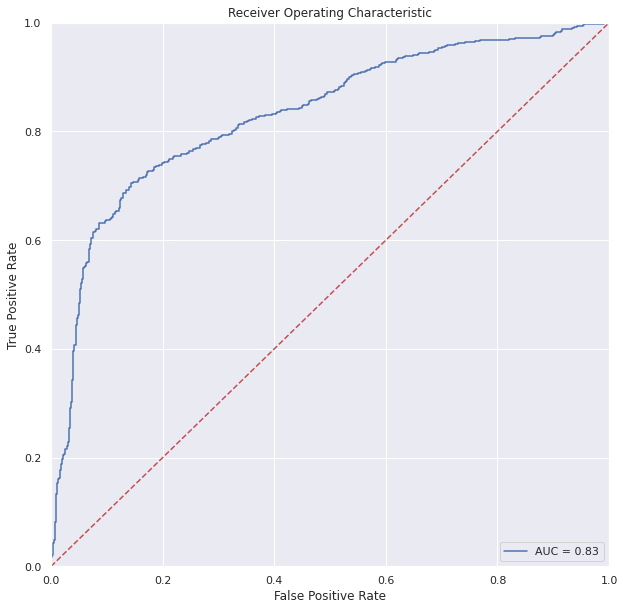

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plot ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random forest Classifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
print(confusion_matrix(y_cv, y_predictions))

print(classification_report(y_cv, y_predictions))

[[706  20]
 [122 604]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       726
           1       0.97      0.83      0.89       726

    accuracy                           0.90      1452
   macro avg       0.91      0.90      0.90      1452
weighted avg       0.91      0.90      0.90      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix plot')

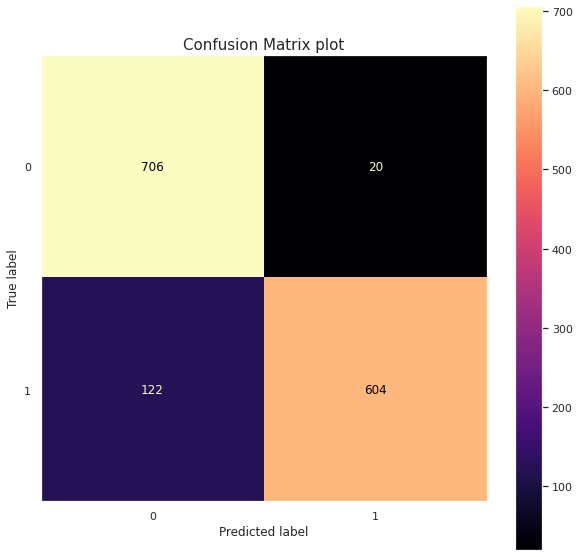

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'magma')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)

AUC for our classifier is: 0.9301732577465109


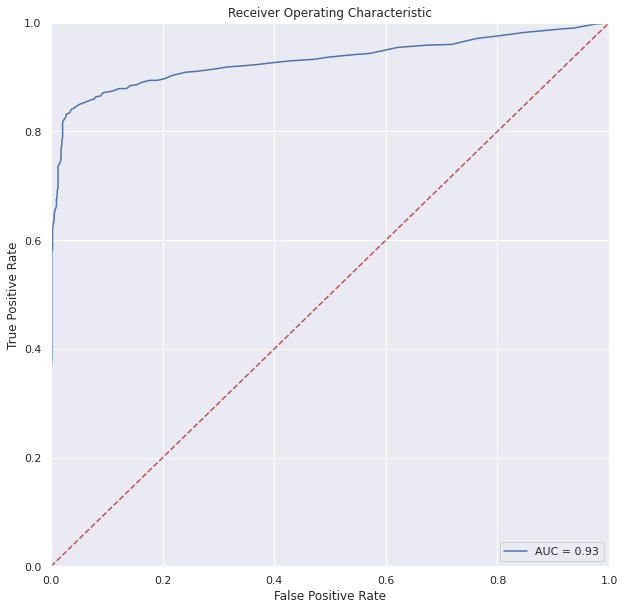

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plot ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

XgB Classifier

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(confusion_matrix(y_cv, y_predictions))

print(classification_report(y_cv, y_predictions))

[[678  48]
 [110 616]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       726
           1       0.93      0.85      0.89       726

    accuracy                           0.89      1452
   macro avg       0.89      0.89      0.89      1452
weighted avg       0.89      0.89      0.89      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix plot')

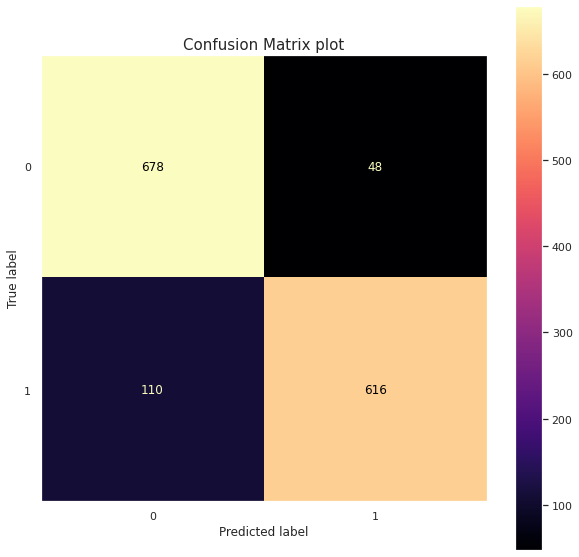

In [ ]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'magma')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)

AUC for our classifier is: 0.9425016506158503


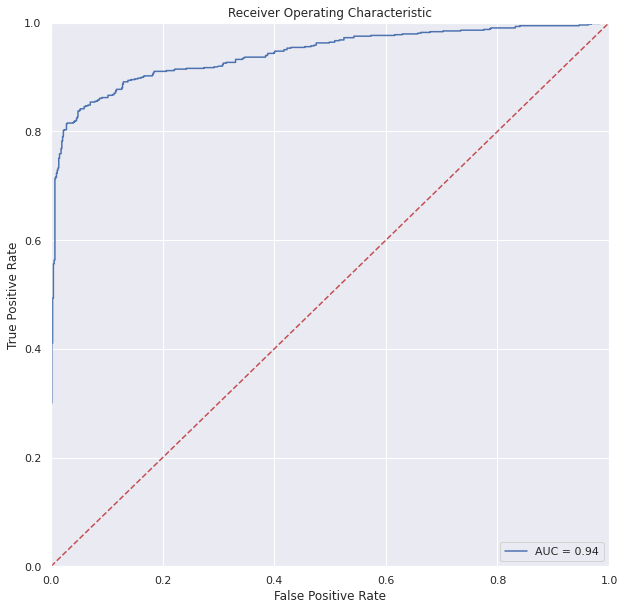

In [ ]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Dari beberepa menggunakan skenario dari masing-masing metode, bahwa performa yang baik di antara model lainya adalah XgB Classifier, mengapa demikian hal tersebut dapat dilihat dari hasil F1-Score dengan Accuracy serta hasil Curve True Positive rate. Karena semakin tinggi hasil True Curve Positif dan semakin kecil False Positif Rate makan Thresholdnya semakin bagus.**

**HyperParameter Tuning model**

Referensi: 
[link text](https://stackoverflow.com/questions/69786993/tuning-xgboost-hyperparameters-with-randomizedsearchcv)
 dan [link text](https://jayant017.medium.com/hyperparameter-tuning-in-xgboost-using-randomizedsearchcv-88fcb5b58a73)


In [ ]:
sub_sample = [0.1, 0.2, 0.3, 0.6, 0.8, 1]

In [ ]:
for sample_value in sub_sample:
    model = xgb.XGBClassifier(subsample = sample_value, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_res, y_res)        
    y_predictions = model.predict(X_cv)
    print(" percentage of samples used in XGB model = {}%".format(np.round(sample_value * 100, 2)))
    print(classification_report(y_predictions, y_cv))
    print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 percentage of samples used in XGB model = 10.0%
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       757
           1       0.85      0.89      0.87       695

    accuracy                           0.87      1452
   macro avg       0.87      0.87      0.87      1452
weighted avg       0.87      0.87      0.87      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 percentage of samples used in XGB model = 20.0%
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       775
           1       0.86      0.92      0.89       677

    accuracy                           0.89      1452
   macro avg       0.89      0.90      0.89      1452
weighted avg       0.90      0.89      0.89      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 percentage of samples used in XGB model = 30.0%
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       775
           1       0.86      0.92      0.89       677

    accuracy                           0.90      1452
   macro avg       0.90      0.90      0.90      1452
weighted avg       0.90      0.90      0.90      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 percentage of samples used in XGB model = 60.0%
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       784
           1       0.86      0.93      0.89       668

    accuracy                           0.90      1452
   macro avg       0.90      0.90      0.90      1452
weighted avg       0.90      0.90      0.90      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 percentage of samples used in XGB model = 80.0%
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       779
           1       0.86      0.92      0.89       673

    accuracy                           0.89      1452
   macro avg       0.89      0.90      0.89      1452
weighted avg       0.90      0.89      0.89      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 percentage of samples used in XGB model = 100%
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       788
           1       0.85      0.93      0.89       664

    accuracy                           0.89      1452
   macro avg       0.89      0.89      0.89      1452
weighted avg       0.89      0.89      0.89      1452





In [ ]:
max_depth_values = [3, 4, 5, 6, 10, 15, 50, 100]

for depth in max_depth_values:
    model = xgb.XGBClassifier(max_depth = depth, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_res, y_res)
    print("The depth of the trees = {}".format(depth, 2))
    y_predictions = model.predict(X_cv)
    print(classification_report(y_predictions, y_cv))
    print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 3
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       788
           1       0.85      0.93      0.89       664

    accuracy                           0.89      1452
   macro avg       0.89      0.89      0.89      1452
weighted avg       0.89      0.89      0.89      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 4
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       802
           1       0.85      0.95      0.90       650

    accuracy                           0.91      1452
   macro avg       0.91      0.91      0.91      1452
weighted avg       0.91      0.91      0.91      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 5
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       802
           1       0.86      0.96      0.90       650

    accuracy                           0.91      1452
   macro avg       0.91      0.91      0.91      1452
weighted avg       0.91      0.91      0.91      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 6
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       802
           1       0.85      0.95      0.90       650

    accuracy                           0.90      1452
   macro avg       0.90      0.91      0.90      1452
weighted avg       0.91      0.90      0.90      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 10
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       811
           1       0.84      0.95      0.89       641

    accuracy                           0.89      1452
   macro avg       0.89      0.90      0.89      1452
weighted avg       0.90      0.89      0.89      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 15
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       820
           1       0.83      0.96      0.89       632

    accuracy                           0.90      1452
   macro avg       0.90      0.90      0.90      1452
weighted avg       0.91      0.90      0.90      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 50
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       817
           1       0.84      0.96      0.89       635

    accuracy                           0.90      1452
   macro avg       0.90      0.91      0.90      1452
weighted avg       0.91      0.90      0.90      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The depth of the trees = 100
              precision    recall  f1-score   support

           0       0.96      0.85      0.90       817
           1       0.84      0.96      0.89       635

    accuracy                           0.90      1452
   macro avg       0.90      0.91      0.90      1452
weighted avg       0.91      0.90      0.90      1452





In [ ]:
num_estimator_values = [5, 8, 10, 20, 30, 50, 100, 500]
for estimators in num_estimator_values:
    model = xgb.XGBClassifier(n_estimators = estimators, eval_metric = 'logloss', n_jobs = -1)
    model.fit(X_res, y_res)
    y_predictions = model.predict(X_cv)
    print("The total number of estimators used in XGB model = {}".format(estimators))
    print(classification_report(y_predictions, y_cv))
    print("\n")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

The total number of estimators used in XGB model = 5
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       924
           1       0.66      0.90      0.76       528

    accuracy                           0.79      1452
   macro avg       0.79      0.82      0.79      1452
weighted avg       0.83      0.79      0.80      1452



The total number of estimators used in XGB model = 8
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       843
           1       0.72      0.86      0.79       609

    accuracy                           0.80      1452
   macro avg       0.80      0.81      0.80      1452
weighted avg       0.82      0.80      0.80      1452



The total number of estimators used in XGB model = 10
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       864
           1       0.72      0.89      0.80       588

    accuracy      

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

The total number of estimators used in XGB model = 50
              precision    recall  f1-score   support

           0       0.92      0.85      0.89       784
           1       0.84      0.92      0.88       668

    accuracy                           0.88      1452
   macro avg       0.88      0.89      0.88      1452
weighted avg       0.89      0.88      0.88      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The total number of estimators used in XGB model = 100
              precision    recall  f1-score   support

           0       0.93      0.86      0.90       788
           1       0.85      0.93      0.89       664

    accuracy                           0.89      1452
   macro avg       0.89      0.89      0.89      1452
weighted avg       0.89      0.89      0.89      1452





/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The total number of estimators used in XGB model = 500
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       801
           1       0.85      0.95      0.90       651

    accuracy                           0.90      1452
   macro avg       0.90      0.91      0.90      1452
weighted avg       0.91      0.90      0.90      1452





In [ ]:
best_number_of_estimators = 100
best_subsamples = 1
best_max_depth_values = 2

model = xgb.XGBClassifier(n_estimators = best_number_of_estimators, max_depth = best_max_depth_values, 
                         subsample = best_subsamples, eval_metric = 'logloss', n_jobs = -1)
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)
print(classification_report(y_predictions, y_cv))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.86      0.88       774
           1       0.85      0.91      0.87       678

    accuracy                           0.88      1452
   macro avg       0.88      0.88      0.88      1452
weighted avg       0.88      0.88      0.88      1452



[[662  64]
 [112 614]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


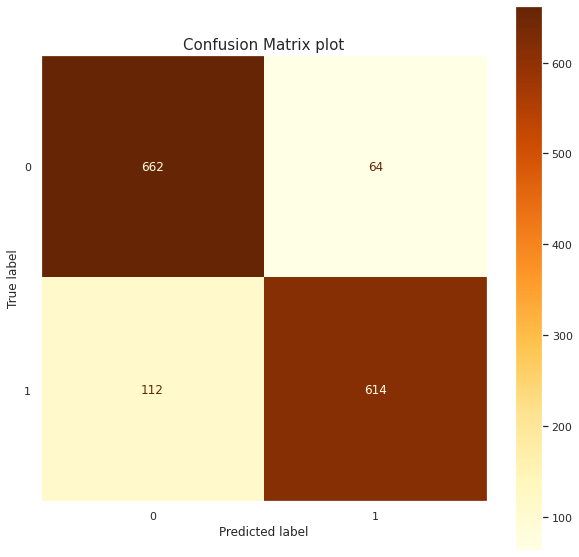

In [ ]:
print(confusion_matrix(y_cv, y_predictions))

fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'YlOrBr')
plt.title("Confusion Matrix plot", fontsize = 15)
plt.grid(False)
plt.show()

AUC for our classifier is: 0.9325751883978781


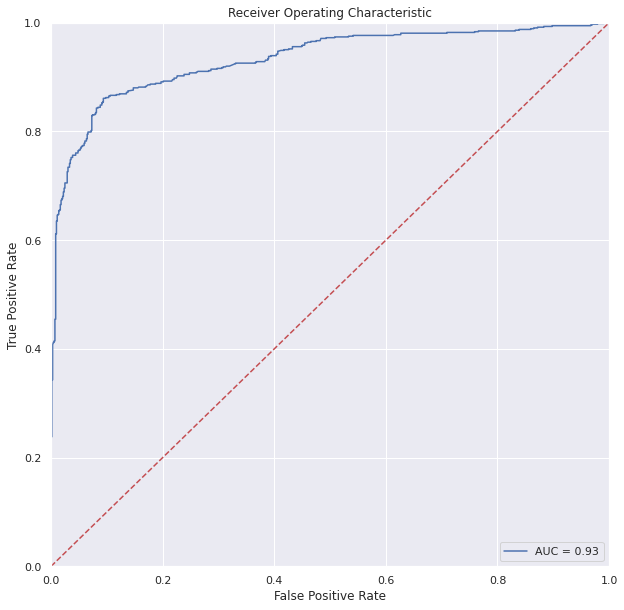

In [ ]:
#grafik thresold AUC
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score



#Best Model XgB
print("The precision score of the best XGB model is: {:.2f}".format(precision_score(y_predictions, y_cv)))
print("The recall score of the best XGB model is: {:.2f}".format(recall_score(y_predictions, y_cv)))
print("The f1 score of the best XGB model is: {:.2f}".format(f1_score(y_predictions, y_cv)))
print("The micro f1 score of the best XGB model is: {:.2f}".format(f1_score(y_predictions, y_cv, average = 'micro')))
print("The macro f1 score of the best XGB model is: {:.2f}".format(f1_score(y_predictions, y_cv, average = 'macro')))
print("The accuracy of the best XGB model is: {:.2f}%".format(accuracy_score(y_predictions, y_cv) * 100))

The precision score of the best XGB model is: 0.85
The recall score of the best XGB model is: 0.91
The f1 score of the best XGB model is: 0.87
The micro f1 score of the best XGB model is: 0.88
The macro f1 score of the best XGB model is: 0.88
The accuracy of the best XGB model is: 87.88%


**Conclusion**

Dari hasil dengan berbagai skenario untuk memperoleh pemodelan yang baik, bahwa struktur atau problem dari imbalanced data ini dapat mempengaruhi dari hasil pemodalan dan juga accuracy.

Selanjutnya dari problem dan goals dapat dikatakan bahwa machine learning mampu diterapkan untuk permasalahn Churn atau pelanggan yang dapat meninggalkan suatu provider dengan baik. Dan hasil dari beberapa model dengan beberapa skenario model yang dihasilkan oleh XgB memperoleh Accuracy yang baik. Drai hasil F1-score dan Accuracy terlihat konsisten 0.90, 0.89, dan hasil AUC sebesar 0.943. Kemudian dilakuakn hyperparamter tuning dengan beberapa skenario pengujian parameter memperoleh hasil F1-score 0.87 dan Accuracy 87.88%. Hasil dari model ini dapat dikatakan baik dan mampu untuk memprediksi klasifikasi prilaku pelanggan untuk menunjukan Churn atau tidak Churn.

**PCA**

PCA merupakan Dimensionality Reduction, teknik berbasis statistik/ML di mana PCA ini bertugas untuk mengurangi jumlah fitur dalam kumpulan dataset dan mendapatkan kumpulan data dengan jumlah dimensi yang optimal. 

Pengurangan dimensi adalah ekstraksi fitur yaitu mengurangi jumlah dimensi dengan memetakan ruang fitur berdimensi lebih tinggi ke ruang fitur berdimensi lebih rendah.

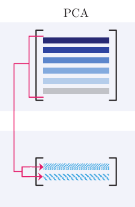

In [1]:
import pandas as pd
import numpy as np

In [5]:
pca_df = pd.read_csv('train.csv')
pca_df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26              161.6              123   
1                      0              243.4              114   
2                      0              299.4               71   
3                      0              166.7              113   
4                     24              218.2               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5              103             16.62   
1             41.38              121.2              110             10.30   
2             50.90               61.9               88              5.26   
3             28.34              148.3              122             12.61   
4             37.09              348.5              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0                254.4                103               11.45   
1                162.6                104                7.32   
2                196.9                 89                8.86   
3                186.9                121                8.41   
4                212.6                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                13.7                 3               3.70   
1                12.2                 5               3.29   
2                 6.6                 7               1.78   
3                10.1                 3               2.73   
4                 7.5                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

In [7]:
pca_df.shape

(4250, 20)

In [8]:
#Function for categorical dan numerical
def get_cat_cols(pca_df):
    num=list(pca_df.columns[df.dtypes=='object'])
    return num
    
def get_num_cols(pca_df):
    cat=list(pca_df.columns[pca_df.dtypes=='int64'])+list(pca_df.columns[pca_df.dtypes=='int32'])+list(pca_df.columns[pca_df.dtypes=='float64'])
    return cat

In [10]:
#define target variable
target_variable = 'churn'

pca_df[target_variable].value_counts(normalize=True)

no     0.859294
yes    0.140706
Name: churn, dtype: float64

In [12]:
#label encoding data
#import Laber Encoder
from sklearn.preprocessing import LabelEncoder

In [13]:
#konversi semua variabel tipe categorical ke tipe numerical  
for column in pca_df.columns:
    if pca_df[column].dtype == np.number: continue
    #terapkan encoding pada tiap variabel categorical
    pca_df[column] = LabelEncoder().fit_transform(pca_df[column])
print(pca_df.head())

   state  account_length  area_code  international_plan  voice_mail_plan  \
0     35             106          1                   0                1   
1     31             136          1                   0                0   
2     35              83          0                   1                0   
3     36              74          1                   1                0   
4     19             120          2                   0                1   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     20              161.6               86   
1                      0              243.4               77   
2                      0              299.4               34   
3                      0              166.7               76   
4                     18              218.2               51   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47              195.5               64             16.62   
1   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#predictor dan target
X = pca_df.drop(target_variable, axis=1)
y = pca_df[[target_variable]]

print("predictor (X) Shape ->",X.shape)
print("Target(y) Shape ->",y.head())

predictor (X) Shape -> (4250, 19)
Target(y) Shape ->    churn
0      0
1      0
2      0
3      0
4      0


In [16]:
from sklearn.model_selection import train_test_split
#splitting data (80% dan 20%)
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2, random_state=13)


# Print output dari masing-masing jumlah baris dan kolom pada data train dan test
print("Jumlah baris dan kolom dari x_train adalah:", x_train.shape,", sedangkan Jumlah baris dan kolom dari y_train:", 
      y_train.shape)
print("Presentase Churn di data Train:")
print(y_train.value_counts(normalize=True))
print("Jumlah baris dan kolom dari x_test adalah:", x_test.shape,", sedangkan Jumlah baris dan kolom dari y_test :", 
      y_test.shape)
print("Presentase Churn di data Test:")
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (3400, 19) , sedangkan Jumlah baris dan kolom dari y_train: (3400, 1)
Presentase Churn di data Train:
churn
0        0.860588
1        0.139412
dtype: float64
Jumlah baris dan kolom dari x_test adalah: (850, 19) , sedangkan Jumlah baris dan kolom dari y_test : (850, 1)
Presentase Churn di data Test:
churn
0        0.854118
1        0.145882
dtype: float64


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
X_train_transform = scaler.transform(x_train)
X_test_transform = scaler.transform(x_test)

In [20]:
len(X_test_transform)

850

In [18]:
len(X_train_transform )

3400

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
pca.fit(X_train_transform)
X_train_reduced = pca.transform(X_train_transform)
X_test_reduced = pca.transform(X_test_transform)

In [24]:
X_train_reduced.shape

(3400, 10)

In [26]:
principal_components = list(range(1, len(pca.explained_variance_ratio_) + 1))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


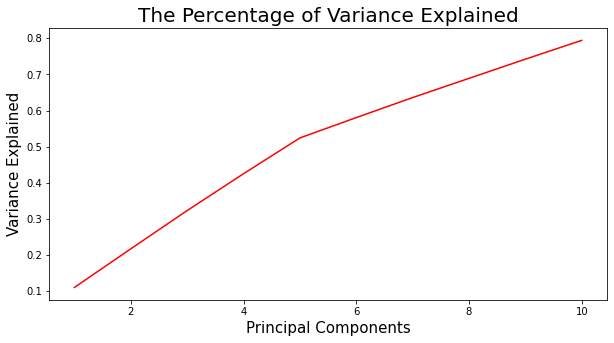

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.lineplot(principal_components, np.cumsum(pca.explained_variance_ratio_), color = 'red')
plt.xlabel('Principal Components', fontsize = 15)
plt.ylabel('Variance Explained', fontsize = 15)
plt.title("The Percentage of Variance Explained", fontsize = 20)
plt.show()

**Build Model**

In [32]:
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import random

In [34]:
#import library
from imblearn.over_sampling import SMOTE
from collections import Counter

#balancing data use SMOTE (Over_sampling)
sm = SMOTE(random_state=13)
X_res, y_res = sm.fit_resample(X_train_reduced, y_train)
X_cv, y_cv = sm.fit_resample(X_test_reduced, y_test)

In [35]:
#model xgb
model = xgb.XGBClassifier()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
print(confusion_matrix(y_cv, y_predictions))

print(classification_report(y_cv, y_predictions))

[[611 115]
 [225 501]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78       726
           1       0.81      0.69      0.75       726

    accuracy                           0.77      1452
   macro avg       0.77      0.77      0.76      1452
weighted avg       0.77      0.77      0.76      1452



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix plot')

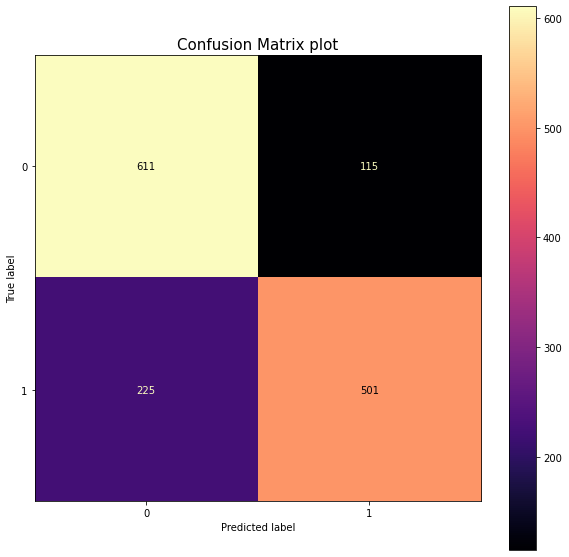

In [37]:
fig, ax = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_cv, y_cv, ax = ax, cmap = 'magma')
plt.grid(False)
plt.title("Confusion Matrix plot", fontsize = 15)

AUC for our classifier is: 0.855939181446319


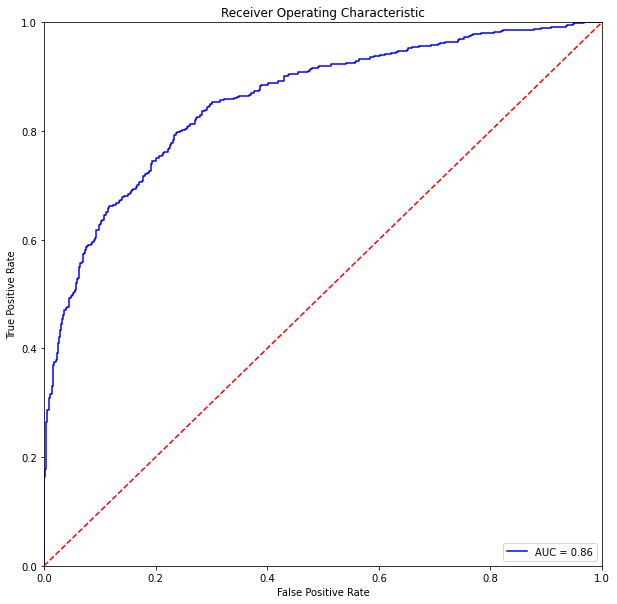

In [38]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
#GaussianNaiveBayes
model = GaussianNB()
model.fit(X_res, y_res)
y_predictions = model.predict(X_cv)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
print(confusion_matrix(y_cv, y_predictions))

print(classification_report(y_cv, y_predictions))

[[545 181]
 [196 530]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       726
           1       0.75      0.73      0.74       726

    accuracy                           0.74      1452
   macro avg       0.74      0.74      0.74      1452
weighted avg       0.74      0.74      0.74      1452



AUC for our classifier is: 0.8021499745767214


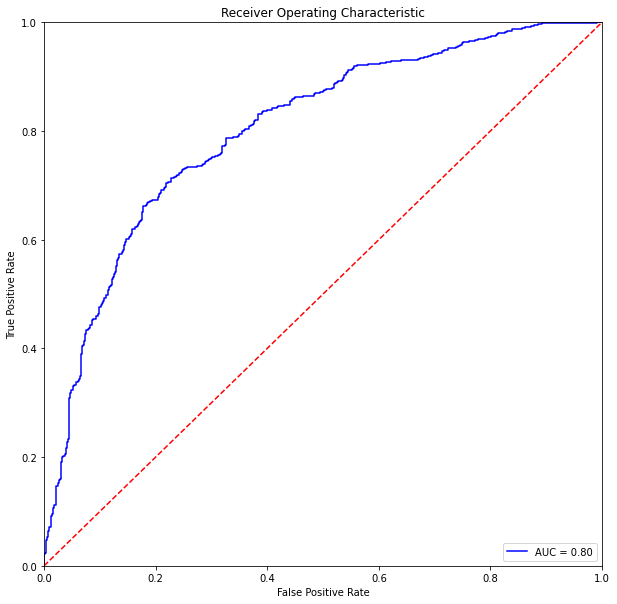

In [41]:
class_probabilities = model.predict_proba(X_cv)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_cv, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.figure(figsize = (10, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Dalam pengaplikasian dari Dimensionality Reduction yaitu PCA memperoleh hasil yang berbeda dari yang tidak menggunakan Dimensionality Reduction hasil dari accuracy model yang menurun. Tetapi dalam pengaplikasina dari Dimensionality Reduction ini, memperoleh hasil relatif konsisten antaran Accuracy dengan F1-score dan hasil model yang dapat dikatakan baik yaitu Xgb classifier.

In [46]:
#pca_df = pca_df.fit(x_train, y_train)
#feature_importances = pca_df.best_estimator_._final_estimator.feature_importances_

In [47]:
#feature = pd.Series(model.feature_importances_, index = x_train.columns).sort_values(ascending = False)
#print(feature)

In [48]:
#plt.figure(figsize = (28,14))
#sns.barplot(x = feature, y = feature.index,color = '#0078d7')
#plt.title("Feature Importance")
#plt.xlabel('Score')
#plt.ylabel('Features')
#plt.show()